# Data Cleaning and EDA  

In [1]:
import pandas as pd
import numpy as np
import ast
import random

import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
movies.head()

/tmp/ipykernel_208/2999627605.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
print(movies.shape)

(45466, 24)


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
# percentage of missing values
total_missing = movies.isnull().sum().sum()
total_cells = np.product(movies.shape)

percent_missing = (total_missing/total_cells)*100
print(f"Percent of missing values in dataset = "+str(percent_missing))

Percent of missing values in dataset = 9.674078798809367


In [6]:
def missing_values(df):
    print(f'Total null values count = {df.isna().sum().sum()}')
    return df.isna().sum()

In [7]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [8]:
# not going to work with these columns
movies.drop(['homepage','original_title','tagline','spoken_languages','overview','poster_path','video'],axis=1,inplace=True)
movies.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


In [9]:
movies = movies.dropna(how='all')

In [10]:
movies['id'] = pd.to_numeric(movies['id'],errors='coerce',downcast='integer')
movies['budget'] = pd.to_numeric(movies['budget'],errors='coerce',downcast='float')
movies['popularity'] = pd.to_numeric(movies['popularity'],errors='coerce',downcast='float')

In [11]:
movies['release_date'] = pd.to_datetime(movies['release_date'],errors='coerce')
movies.dropna(subset = ['release_date'],axis=0,inplace=True)
movies['release_year'] = movies['release_date'].dt.year
movies['release_month'] = movies['release_date'].dt.month

# too much null values in "belongs_to_collection" so filling it either with 1(belongs) or 0(not belongs)
movies['belongs_to_collection'] = movies['belongs_to_collection'].fillna('None')
movies[['collection_name']] = movies[['belongs_to_collection']].applymap(lambda x: 'None' if x=='None' else ast.literal_eval(x)['name'])
movies['belongs_to_collection'] = movies['belongs_to_collection'].map(lambda x: 0 if x == 'None' else 1)

In [12]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
def get_day(x):
    try:  
        answer = x.weekday()
        return day_order[answer]
    except:
        return np.nan

movies['day'] = movies['release_date'].apply(get_day)

In [13]:
movies.head(2)

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,...,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,collection_name,day
0,False,1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,10,Toy Story Collection,Mon
1,False,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995,12,None,Fri


In [14]:
missing_values(movies)

Total null values count=351


adult                      0
belongs_to_collection      0
budget                     0
genres                     0
id                         0
imdb_id                   14
original_language         11
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                  246
status                    80
title                      0
vote_average               0
vote_count                 0
release_year               0
release_month              0
collection_name            0
day                        0
dtype: int64

In [15]:
movies['status'].fillna(movies['status'].mode()[0],inplace=True)
movies['runtime'] = movies['runtime'].replace(0,np.nan)
movies['runtime'].fillna(movies['runtime'].mean(),inplace=True)
movies['original_language'].fillna(movies['original_language'].mode()[0],inplace=True)

In [16]:
movies['return'] = movies['revenue'] / movies['budget']
movies['success_or_flop'] = movies['return'].map(lambda x: 1 if x>=1 else 0)
movies.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,release_year,release_month,collection_name,day,return,success_or_flop
0,False,1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,Toy Story,7.7,5415.0,1995,10,Toy Story Collection,Mon,12.451801,1
1,False,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,Jumanji,6.9,2413.0,1995,12,None,Fri,4.043035,1
2,False,1,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,tt0113228,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,Grumpier Old Men,6.5,92.0,1995,12,Grumpy Old Men Collection,Fri,NaN,0
3,False,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,Waiting to Exhale,6.1,34.0,1995,12,None,Fri,5.090760,1
4,False,1,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862.0,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,Father of the Bride Part II,5.7,173.0,1995,2,Father of the Bride Collection,Fri,inf,1


In [17]:
# very less rows in 'imdb_id' = 14 with missing values so removing them
movies = movies.dropna(subset='imdb_id')
movies.reset_index(inplace=True,drop=True)
missing_values(movies)

Total null values count=34451


adult                        0
belongs_to_collection        0
budget                       0
genres                       0
id                           0
imdb_id                      0
original_language            0
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
status                       0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
release_month                0
collection_name              0
day                          0
return                   34451
success_or_flop              0
dtype: int64

In [18]:
def json_to_list(row,want='name'):
    new_list = ast.literal_eval(row)    
    if new_list == [] or isinstance(new_list,float):
        return (np.nan)
    else:
        inner = []
        for j in new_list:
            inner.append(j[want])
        return (inner)
    
movies[['production_companies']] = movies[['production_companies']].applymap(json_to_list)
movies[['production_countries']] = movies[['production_countries']].applymap(lambda row: json_to_list(row ,'iso_3166_1'))
movies[['genres']] = movies[['genres']].applymap(json_to_list)

In [19]:
movies.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,release_year,release_month,collection_name,day,return,success_or_flop
0,False,1,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,en,21.946943,[Pixar Animation Studios],[US],...,Released,Toy Story,7.7,5415.0,1995,10,Toy Story Collection,Mon,12.451801,1
1,False,0,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],...,Released,Jumanji,6.9,2413.0,1995,12,None,Fri,4.043035,1
2,False,1,0.0,"[Romance, Comedy]",15602.0,tt0113228,en,11.712900,"[Warner Bros., Lancaster Gate]",[US],...,Released,Grumpier Old Men,6.5,92.0,1995,12,Grumpy Old Men Collection,Fri,NaN,0
3,False,0,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,en,3.859495,[Twentieth Century Fox Film Corporation],[US],...,Released,Waiting to Exhale,6.1,34.0,1995,12,None,Fri,5.090760,1
4,False,1,0.0,[Comedy],11862.0,tt0113041,en,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],...,Released,Father of the Bride Part II,5.7,173.0,1995,2,Father of the Bride Collection,Fri,inf,1


In [20]:
# unusual as no budget or revenue of any film = 0 also there are outliers as there is drastic change in mean and 50%(median)
# It also seems like most values are 0 or close to 0
print(movies.budget.describe())
print(movies.revenue.describe())

count    4.536200e+04
mean     4.233889e+06
std      1.744240e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64
count    4.536200e+04
mean     1.123357e+07
std      6.439959e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64


In [21]:
movies[movies.budget == 0].shape

(36477, 23)

In [22]:
# replacing these values with NaN
movies['budget'] = movies['budget'].replace(0,np.nan)
movies['revenue'] = movies['revenue'].replace(0,np.nan)

In [23]:
missing_values(movies)

Total null values count=129259


adult                        0
belongs_to_collection        0
budget                   36477
genres                    2381
id                           0
imdb_id                      0
original_language            0
popularity                   0
production_companies     11789
production_countries      6206
release_date                 0
revenue                  37955
runtime                      0
status                       0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
release_month                0
collection_name              0
day                          0
return                   34451
success_or_flop              0
dtype: int64

In [24]:
# Scaling values in 'budget' or 'revenue'
def scale_money(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 10000
    elif num >= 1000 and num < 10000:
        return num *100
    else:
        return num
    
movies[['budget', 'revenue']] = movies[['budget', 'revenue']].applymap(scale_money)

In [25]:
## function to get all uniqye categories(except NaN values) and return as a dictionary
def get_all_items(df , col):
    all_items = {}
    for row in df[col]:
        counter = 0
        if row == np.nan or isinstance(row,float) :
            continue
        for single_value in row:  
            value = all_items.get(single_value)
            if value == None:
                all_items[single_value] = counter + 1
            else:
                all_items[single_value] = value + 1
    return all_items

# get all genres
all_genres = get_all_items(movies , 'genres')

# get major production companies
all_companies = get_all_items(movies ,'production_companies')
major_prod_company = {k:v for (k,v) in all_companies.items() if v > 50}

# get all production countries
all_countries = get_all_items(movies ,'production_countries')

In [26]:
# finding all the franchise names with revenue ,budget,popularity
franchise = movies.dropna().groupby(by='collection_name').agg({'revenue':['sum','mean'], 
                                                               'budget':['sum','mean'],
                                                               'title':'count',
                                                               'popularity':'mean'
                                                              })
most_films_franchise = franchise.sort_values([('title','count')],ascending=False)[1:20]

In [27]:
# franchise with highest popularity
highest_popularity_franchises = franchise.sort_values([('popularity','mean')],ascending=False)[1:20]
highest_popularity_franchises

revenue                \
                                                 sum          mean   
collection_name                                                      
Deadpool Collection                     7.831130e+08  7.831130e+08   
Avatar Collection                       2.787965e+09  2.787965e+09   
Despicable Me Collection                3.691070e+09  9.227676e+08   
Guardians of the Galaxy Collection      1.636745e+09  8.183724e+08   
John Wick Collection                    2.603015e+08  1.301508e+08   
Blade Runner Collection                 3.313962e+07  3.313962e+07   
Planet of the Apes (Reboot) Collection  1.563413e+09  5.211376e+08   
The Avengers Collection                 2.924962e+09  1.462481e+09   
Captain America Collection              2.238641e+09  7.462136e+08   
The Maze Runner Collection              6.595768e+08  3.297884e+08   
The Dark Knight Collection              2.463716e+09  8.212387e+08   
The Hunger Games Collection             2.944163e+09  7.360407e+08   
Pirates of the Caribbean Collection     4.521577e+09  9.043154e+08   
Prometheus Collection                   6.355504e+08  3.177752e+08   
Fantastic Beasts Collection             8.093423e+08  8.093423e+08   
The Three Mothers Collection            5.494700e+04  5.494700e+04   
Pacific Rim Collection                  4.076029e+08  4.076029e+08   
Thor Collection                         1.093898e+09  5.469490e+08   
The Godfather Collection                4.293753e+08  1.431251e+08   

                                              budget               title  \
                                                 sum          mean count   
collection_name                                                            
Deadpool Collection                     5.800000e+07  5.800000e+07     1   
Avatar Collection                       2.370000e+08  2.370000e+08     1   
Despicable Me Collection                2.990000e+08  7.475000e+07     4   
Guardians of the Galaxy Collection      3.700000e+08  1.850000e+08     2   
John Wick Collection                    6.000000e+07  3.000000e+07     2   
Blade Runner Collection                 2.800000e+07  2.800000e+07     1   
Planet of the Apes (Reboot) Collection  4.150000e+08  1.383333e+08     3   
The Avengers Collection                 5.000000e+08  2.500000e+08     2   
Captain America Collection              5.600000e+08  1.866667e+08     3   
The Maze Runner Collection              9.500000e+07  4.750000e+07     2   
The Dark Knight Collection              5.850000e+08  1.950000e+08     3   
The Hunger Games Collection             4.900000e+08  1.225000e+08     4   
Pirates of the Caribbean Collection     1.250000e+09  2.500000e+08     5   
Prometheus Collection                   2.270000e+08  1.135000e+08     2   
Fantastic Beasts Collection             1.800000e+08  1.800000e+08     1   
The Three Mothers Collection            3.500000e+06  3.500000e+06     1   
Pacific Rim Collection                  1.800000e+08  1.800000e+08     1   
Thor Collection                         3.200000e+08  1.600000e+08     2   
The Godfather Collection                7.300000e+07  2.433333e+07     3   

                                        popularity  
                                              mean  
collection_name                                     
Deadpool Collection                     187.860489  
Avatar Collection                       185.070892  
Despicable Me Collection                157.804459  
Guardians of the Galaxy Collection      119.311295  
John Wick Collection                    116.558945  
Blade Runner Collection                  96.272377  
Planet of the Apes (Reboot) Collection   87.720253  
The Avengers Collection                  63.633537  
Captain America Collection               61.307812  
The Maze Runner Collection               59.081829  
The Dark Knight Collection               57.418396  
The Hunger Games Collection              54.766747  
Pirates of the Caribbean Collection 

**By looking above table we see that most people like comedy , action , thriller , animation genres movies**

## Most number of movies in a franchise

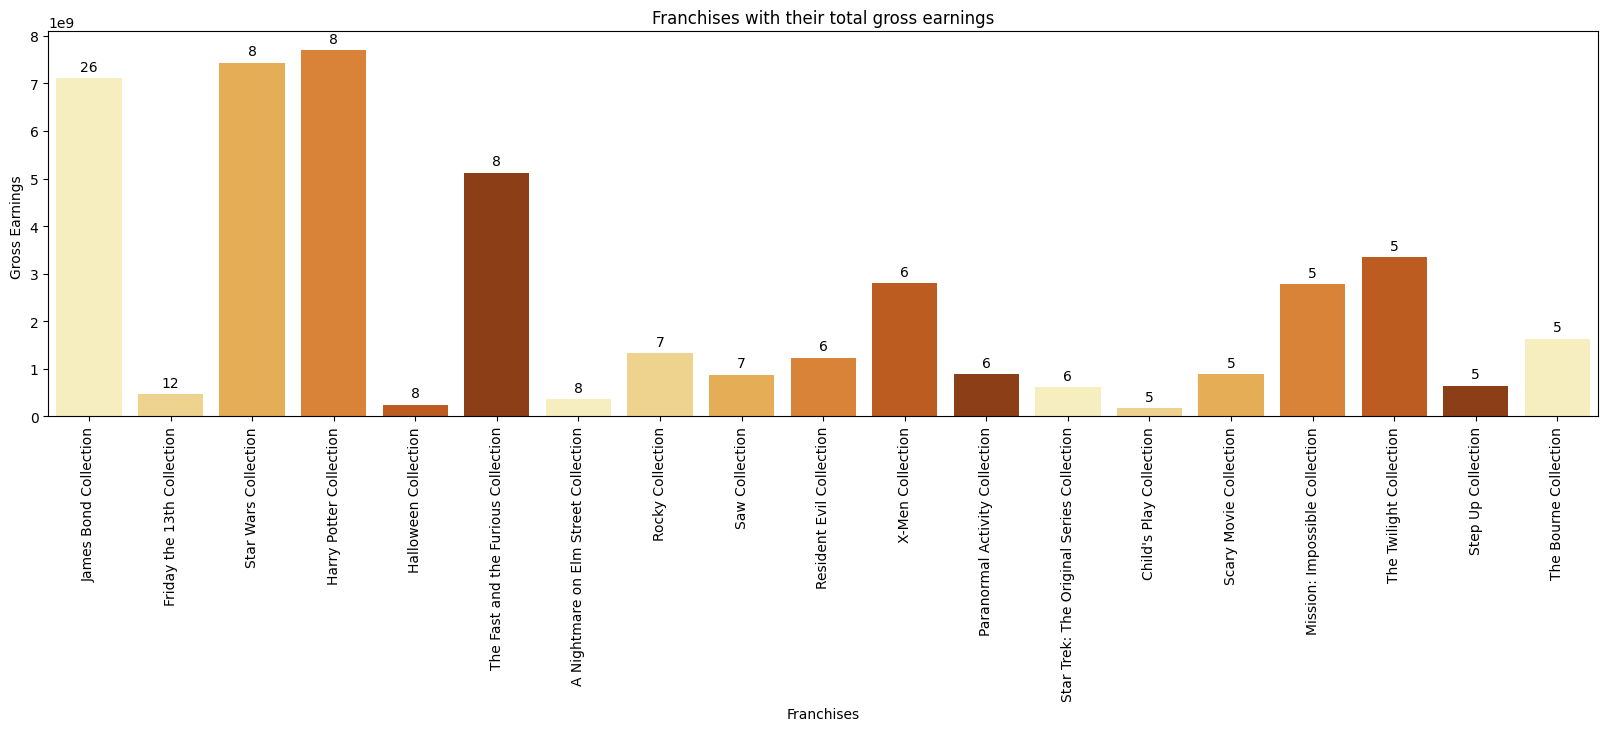

In [28]:
plt.figure(figsize=(20,5))
ax = sns.barplot(y=most_films_franchise[('revenue','sum')],x=most_films_franchise.index,errorbar=None , palette = sns.color_palette("YlOrBr"))
plt.xlabel('Franchises')
plt.title('Franchises with their total gross earnings')
plt.ylabel('Gross Earnings ')
plt.xticks(rotation=90)


count = most_films_franchise[('title','count')]
ax.bar_label(ax.containers[0], labels=count, padding=3)

plt.show()

**On each bar shows the total movies in a franchise with their gross earnings in billions. *James Bond Franchise* has 26 films followed by *Friday the 13th Collection(12 films)* and *Star Wars Collection(8 films)***

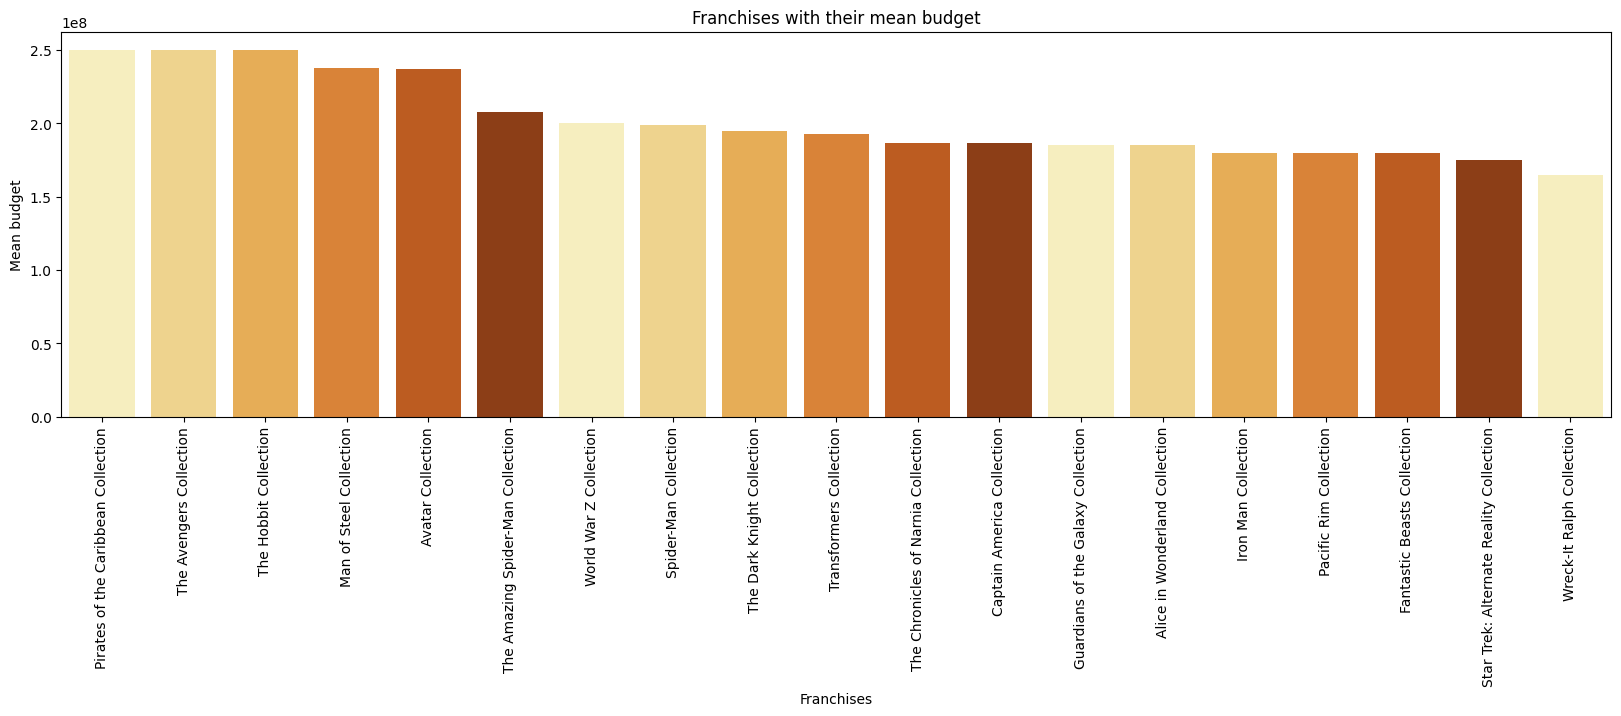

In [29]:
#  franchises with their mean budget
franchise_mean_budget = franchise.sort_values([('budget','mean')],ascending=False)[1:20]

plt.figure(figsize=(20,5))
ax = sns.barplot(y=franchise_mean_budget[('budget','mean')],x=franchise_mean_budget.index,errorbar=None , palette = sns.color_palette("YlOrBr"))
plt.xlabel('Franchises')
plt.title('Franchises with their mean budget')
plt.ylabel('Mean budget')
plt.xticks(rotation=90)
plt.show()

**We can see that Pirates of the Caribbean Collection , The Avengers Collection , The Hobbit Collection has highest mean budget among all**

In [30]:
# franchises with highest total revenue generated 
franchise.sort_values([('revenue','sum')],ascending=False)[1:10]

revenue                      budget  \
                                              sum          mean           sum   
collection_name                                                                 
Harry Potter Collection              7.707367e+09  9.634209e+08  1.280000e+09   
Star Wars Collection                 7.434495e+09  9.293118e+08  8.543500e+08   
James Bond Collection                7.106970e+09  2.733450e+08  1.539650e+09   
The Fast and the Furious Collection  5.125099e+09  6.406373e+08  1.009000e+09   
Pirates of the Caribbean Collection  4.521577e+09  9.043154e+08  1.250000e+09   
Transformers Collection              4.366101e+09  8.732202e+08  9.650000e+08   
Despicable Me Collection             3.691070e+09  9.227676e+08  2.990000e+08   
The Twilight Collection              3.342107e+09  6.684215e+08  3.850000e+08   
Ice Age Collection                   3.216709e+09  6.433417e+08  4.290000e+08   

                                                  title  popularity  
                                             mean count        mean  
collection_name                                                      
Harry Potter Collection              1.600000e+08     8   26.253893  
Star Wars Collection                 1.067938e+08     8   23.410919  
James Bond Collection                5.921731e+07    26   13.453503  
The Fast and the Furious Collection  1.261250e+08     8   10.799436  
Pirates of the Caribbean Collection  2.500000e+08     5   53.972237  
Transformers Collection              1.930000e+08     5   14.425076  
Despicable Me Collection             7.475000e+07     4  157.804459  
The Twilight Collection              7.700000e+07     5   29.500843  
Ice Age Collection                   8.580000e+07     5   16.075235

**The *Harry Potter Collection* has highest total revenue followed by *Star Wars and James Bond Collection***

In [31]:
# franchises with highest mean revenue
franchise.sort_values([('revenue','mean')],ascending=False)[1:10]

revenue                      budget  \
                                              sum          mean           sum   
collection_name                                                                 
The Avengers Collection              2.924962e+09  1.462481e+09  5.000000e+08   
Frozen Collection                    1.274219e+09  1.274219e+09  1.500000e+08   
Finding Nemo Collection              1.968906e+09  9.844532e+08  2.940000e+08   
The Hobbit Collection                2.935523e+09  9.785078e+08  7.500000e+08   
The Lord of the Rings Collection     2.916545e+09  9.721816e+08  2.660000e+08   
Harry Potter Collection              7.707367e+09  9.634209e+08  1.280000e+09   
Star Wars Collection                 7.434495e+09  9.293118e+08  8.543500e+08   
Despicable Me Collection             3.691070e+09  9.227676e+08  2.990000e+08   
Pirates of the Caribbean Collection  4.521577e+09  9.043154e+08  1.250000e+09   

                                                  title  popularity  
                                             mean count        mean  
collection_name                                                      
The Avengers Collection              2.500000e+08     2   63.633537  
Frozen Collection                    1.500000e+08     1   24.248243  
Finding Nemo Collection              1.470000e+08     2   19.987736  
The Hobbit Collection                2.500000e+08     3   25.205614  
The Lord of the Rings Collection     8.866667e+07     3   30.272873  
Harry Potter Collection              1.600000e+08     8   26.253893  
Star Wars Collection                 1.067938e+08     8   23.410919  
Despicable Me Collection             7.475000e+07     4  157.804459  
Pirates of the Caribbean Collection  2.500000e+08     5   53.972237

**The *Avengers collection* with 2 movies in franchise has highest mean revenue.It is followed by *Frozen collection and Finding nemo collection***

## All genres of movies

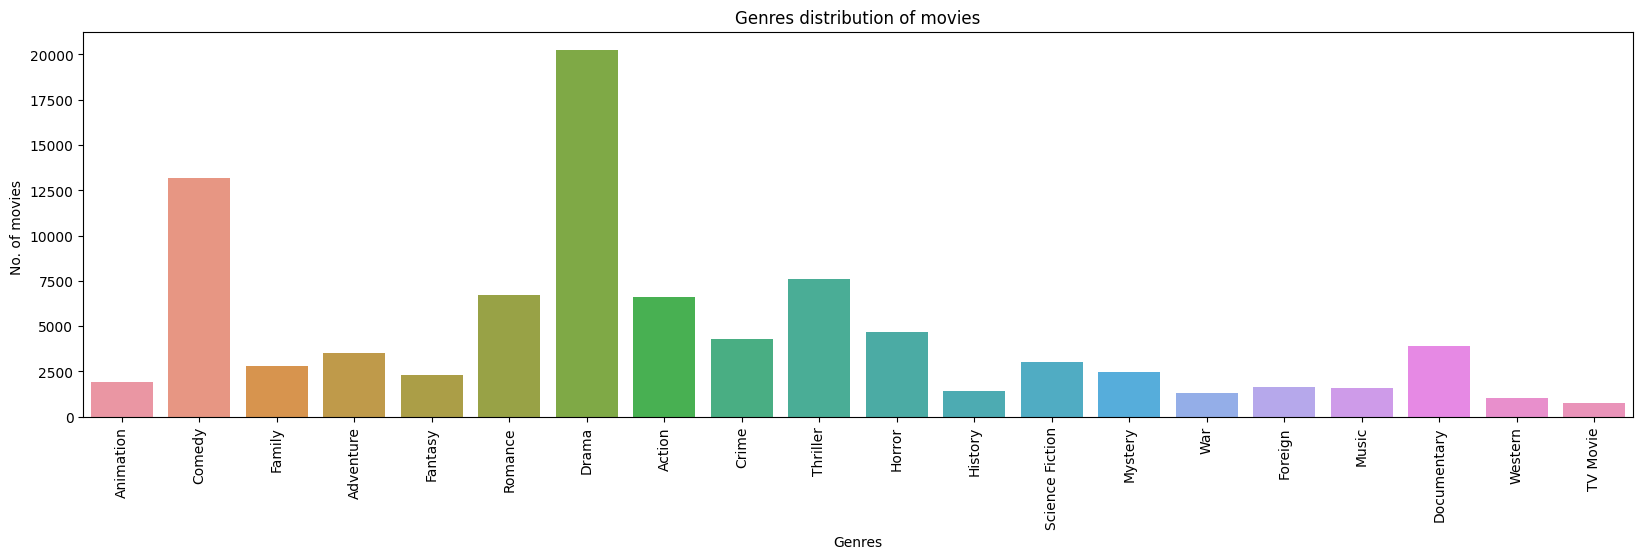

In [32]:
fig = plt.figure(figsize = (20, 5))
all_genre_keys = list(all_genres.keys())
all_genre_values = [int(i) for i in all_genres.values()]
sns.barplot(x=all_genre_keys, y = all_genre_values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('No. of movies ')
plt.title('Genres distribution of movies')
plt.show()

**Drame is liked in 1st place followed by Comedy, Crime , Thriller type movies** 

In [33]:
# filling NaN values with major genres
choices = [['Drama'],['Comedy'],['Thriller']]
movies['genres'] = [random.choice(choices) if isinstance(x,float) else x for x in movies['genres']]

## Major production comapnies

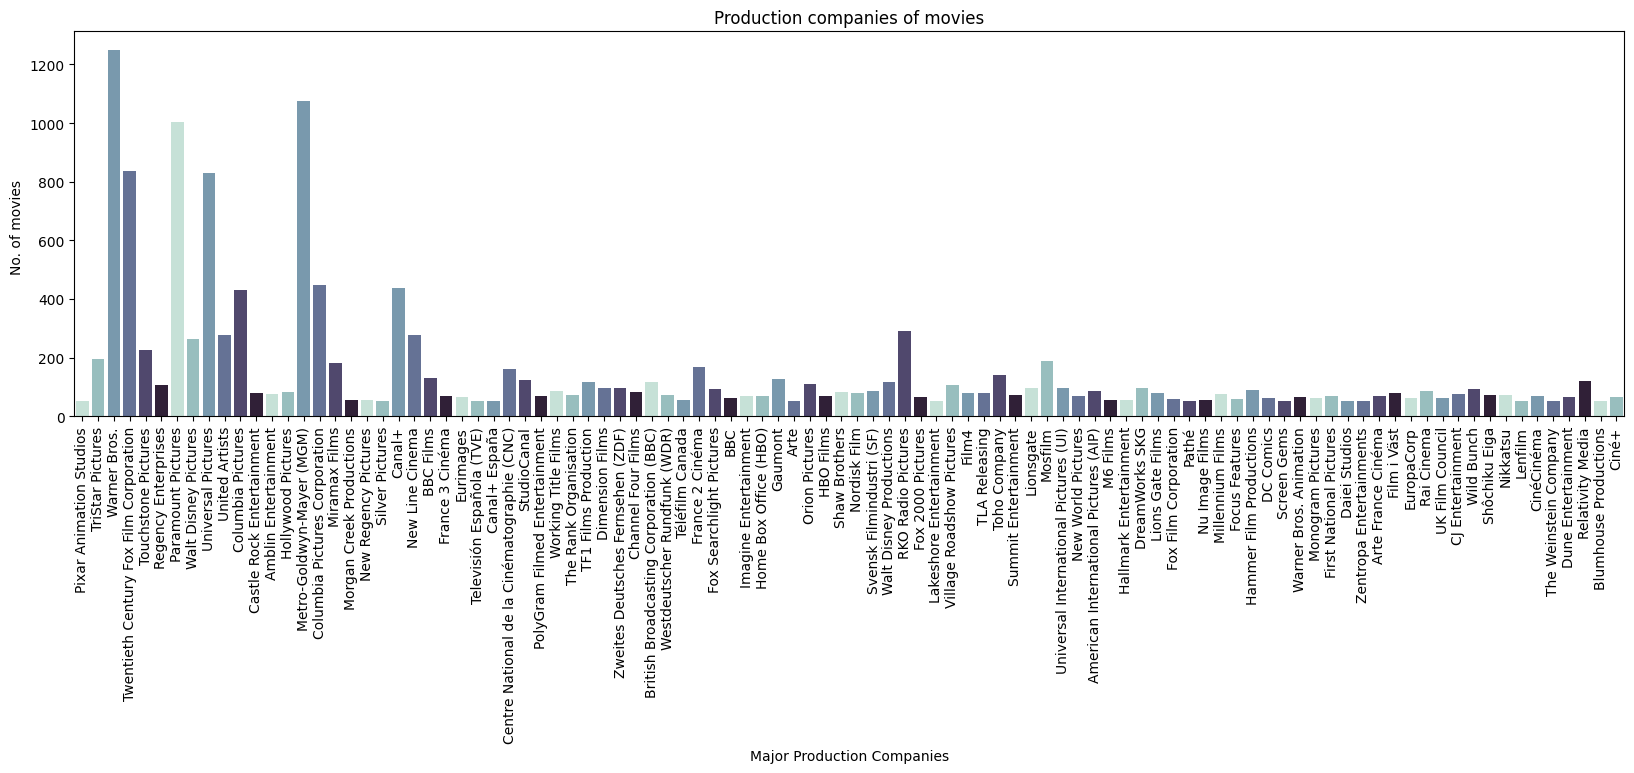

In [34]:
fig = plt.figure(figsize = (20, 5))
prod_keys = list(major_prod_company.keys())
prod_values = [int(i) for i in major_prod_company.values()]
sns.barplot(x=prod_keys, y = prod_values , palette = sns.cubehelix_palette(start=.5, rot=-.5))
plt.xticks(rotation=90)
plt.xlabel('Major Production Companies')
plt.ylabel('No. of movies ')
plt.title('Production companies of movies')
plt.show()

**Warner Bros,Paramount Pictures , MGM has produced most number of movies**

In [35]:
# filling NaN with major production companies
choices = [['Twentieth Century Fox Film Corporation'],['Metro-Goldwyn-Mayer (MGM)'],['Paramount Pictures'],['Columbia Pictures']]
movies['production_companies'] = [random.choice(choices) if isinstance(x,float) else x for x in movies['production_companies']]

## No. of movies released each year

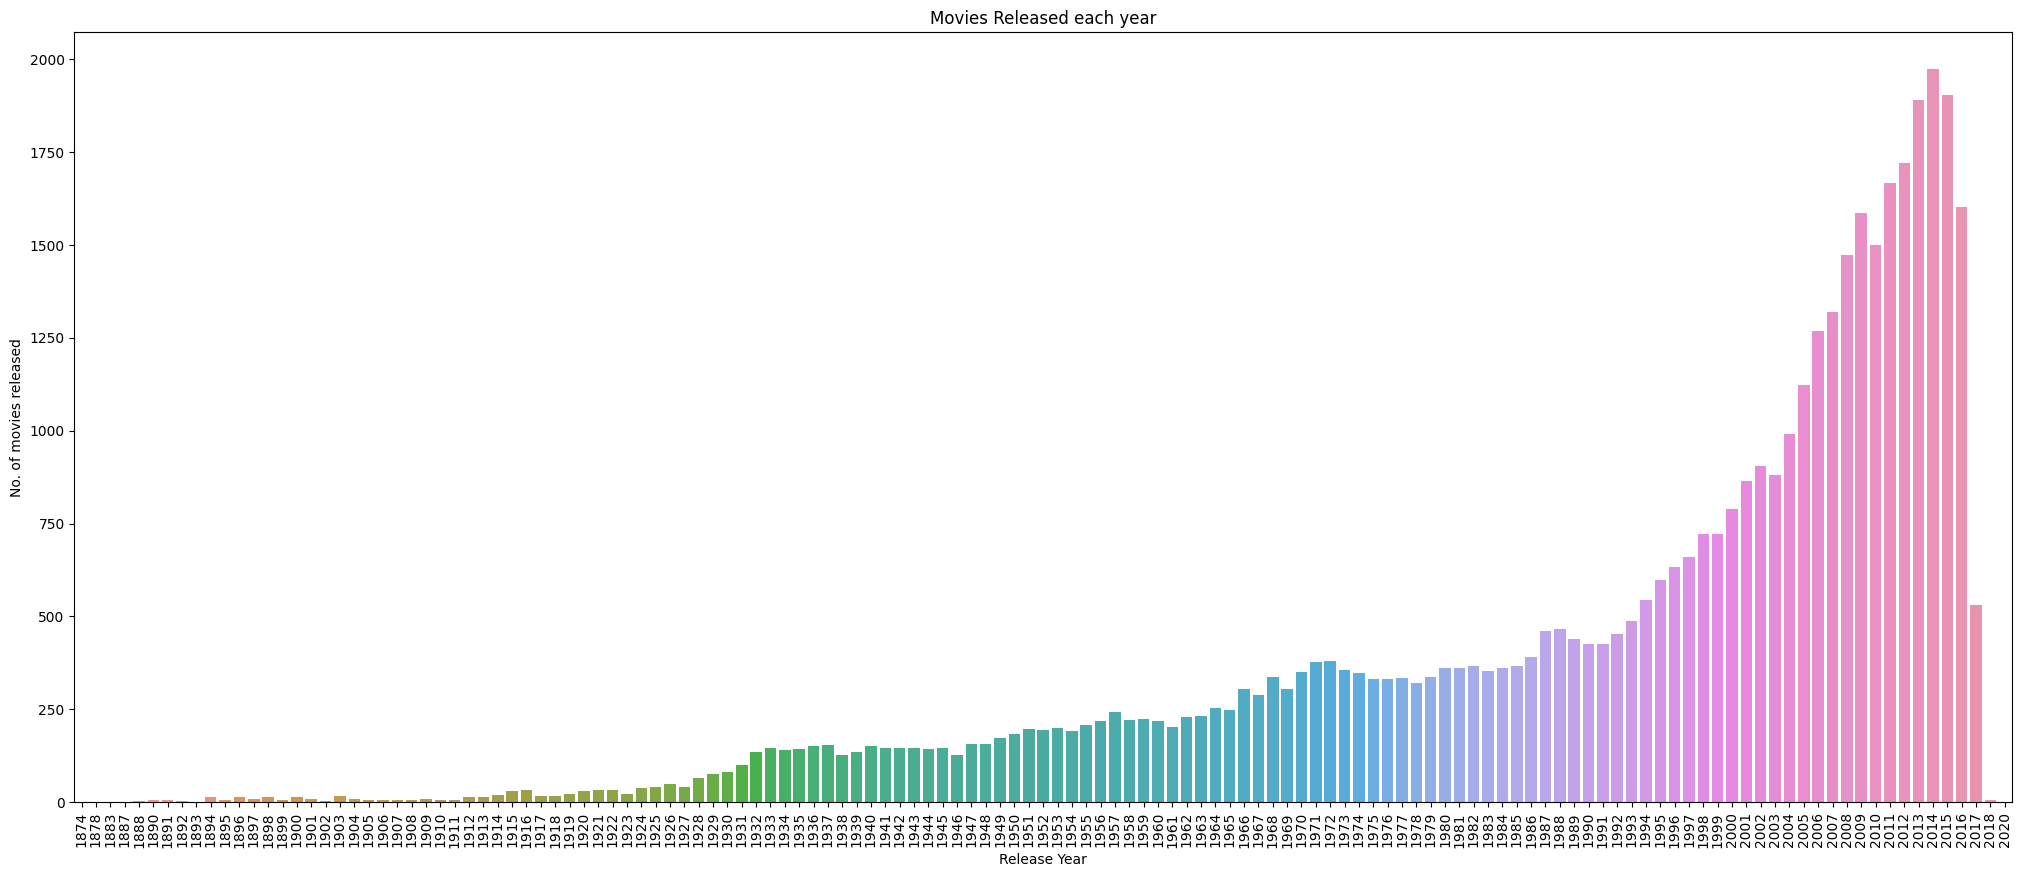

In [36]:
year_name = movies['release_year'].value_counts().index.tolist()
year_count = movies['release_year'].value_counts().tolist()

fig = plt.figure(figsize = (25, 10))
sns.barplot(x=year_name,y=year_count)
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('No. of movies released')
plt.title('Movies Released each year')
plt.show()

**There is sharp rise in the release of number of movies released per yer after 1900**

## No. of movies made in each language

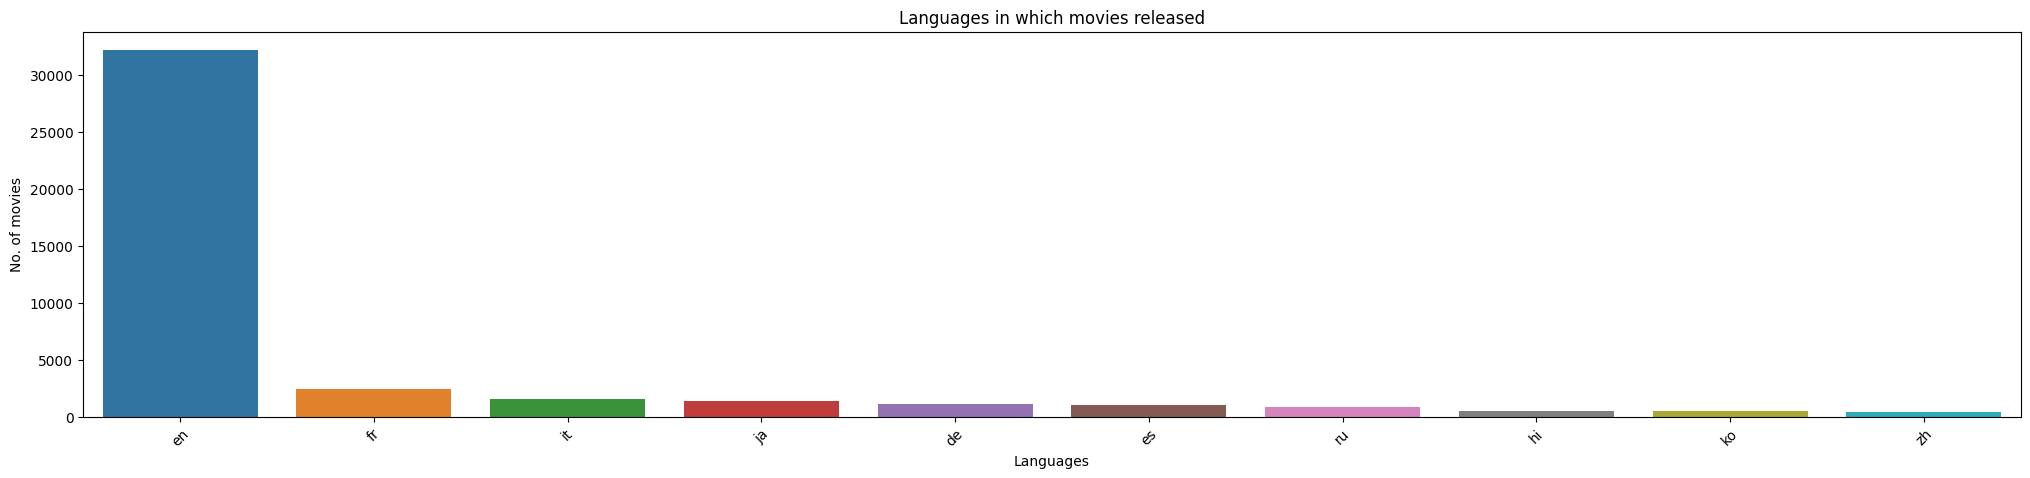

In [37]:
lang_name = movies['original_language'].value_counts().index.tolist()[0:10]
lang_count = movies['original_language'].value_counts().tolist()[0:10]

fig = plt.figure(figsize = (25, 5))
sns.barplot(x=lang_name,y=lang_count)
plt.xticks(rotation=45)
plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title('Languages in which movies released')
plt.show()

**Major number of movies are made in english , followed by french , italian**

## Major production countries

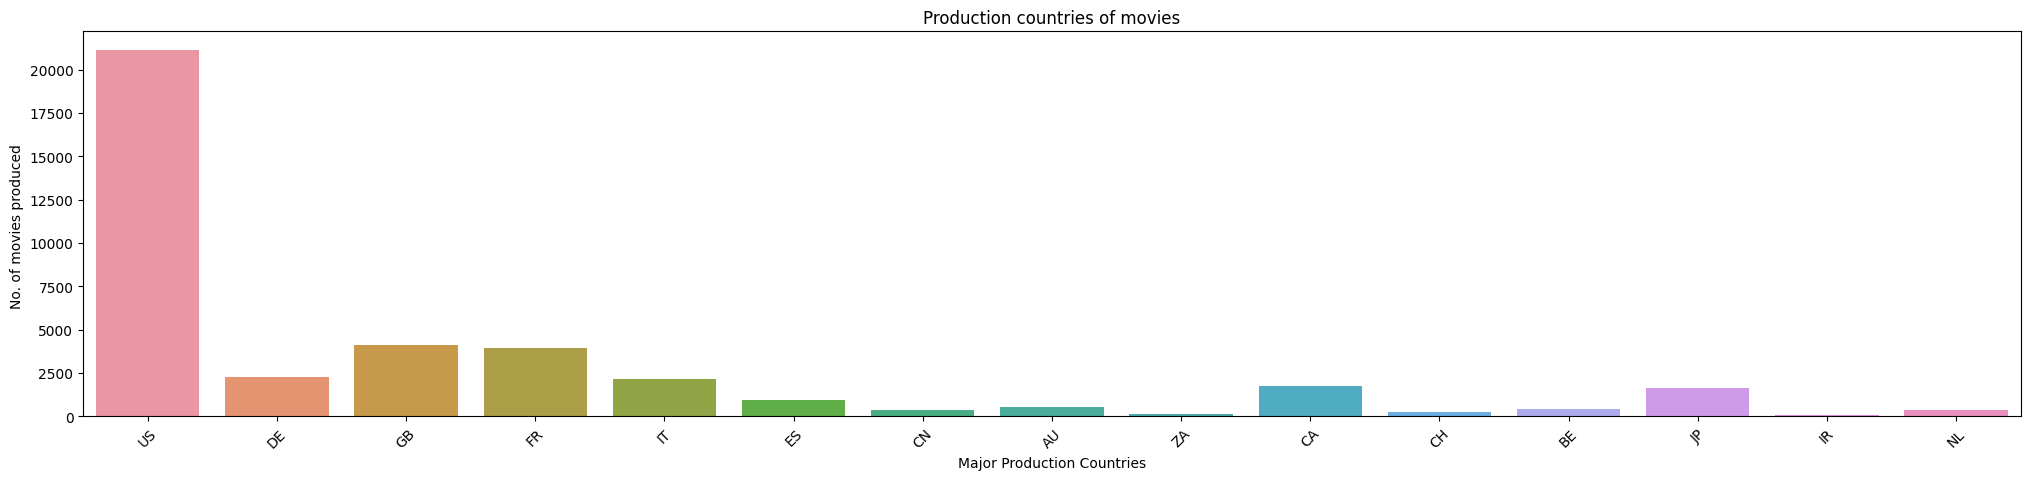

In [38]:
fig = plt.figure(figsize = (25, 5))
countries_keys = list(all_countries.keys())[0:15]
countries_values = [int(i) for i in all_countries.values()][0:15]
sns.barplot(x=countries_keys, y = countries_values)
plt.xticks(rotation=45)
plt.xlabel('Major Production Countries')
plt.ylabel('No. of movies produced ')
plt.title('Production countries of movies')
plt.show()

**Major movies are made in US followed by Germany , United Kingdom , France**

In [39]:
# Filling NaN values in 'production_countries' with major production countries
choices = [['US','DE'],['GB','FR']]
movies['production_countries'] = [random.choice(choices) if isinstance(x,float) else x for x in movies['production_countries']]

## Revenue of movies in each year

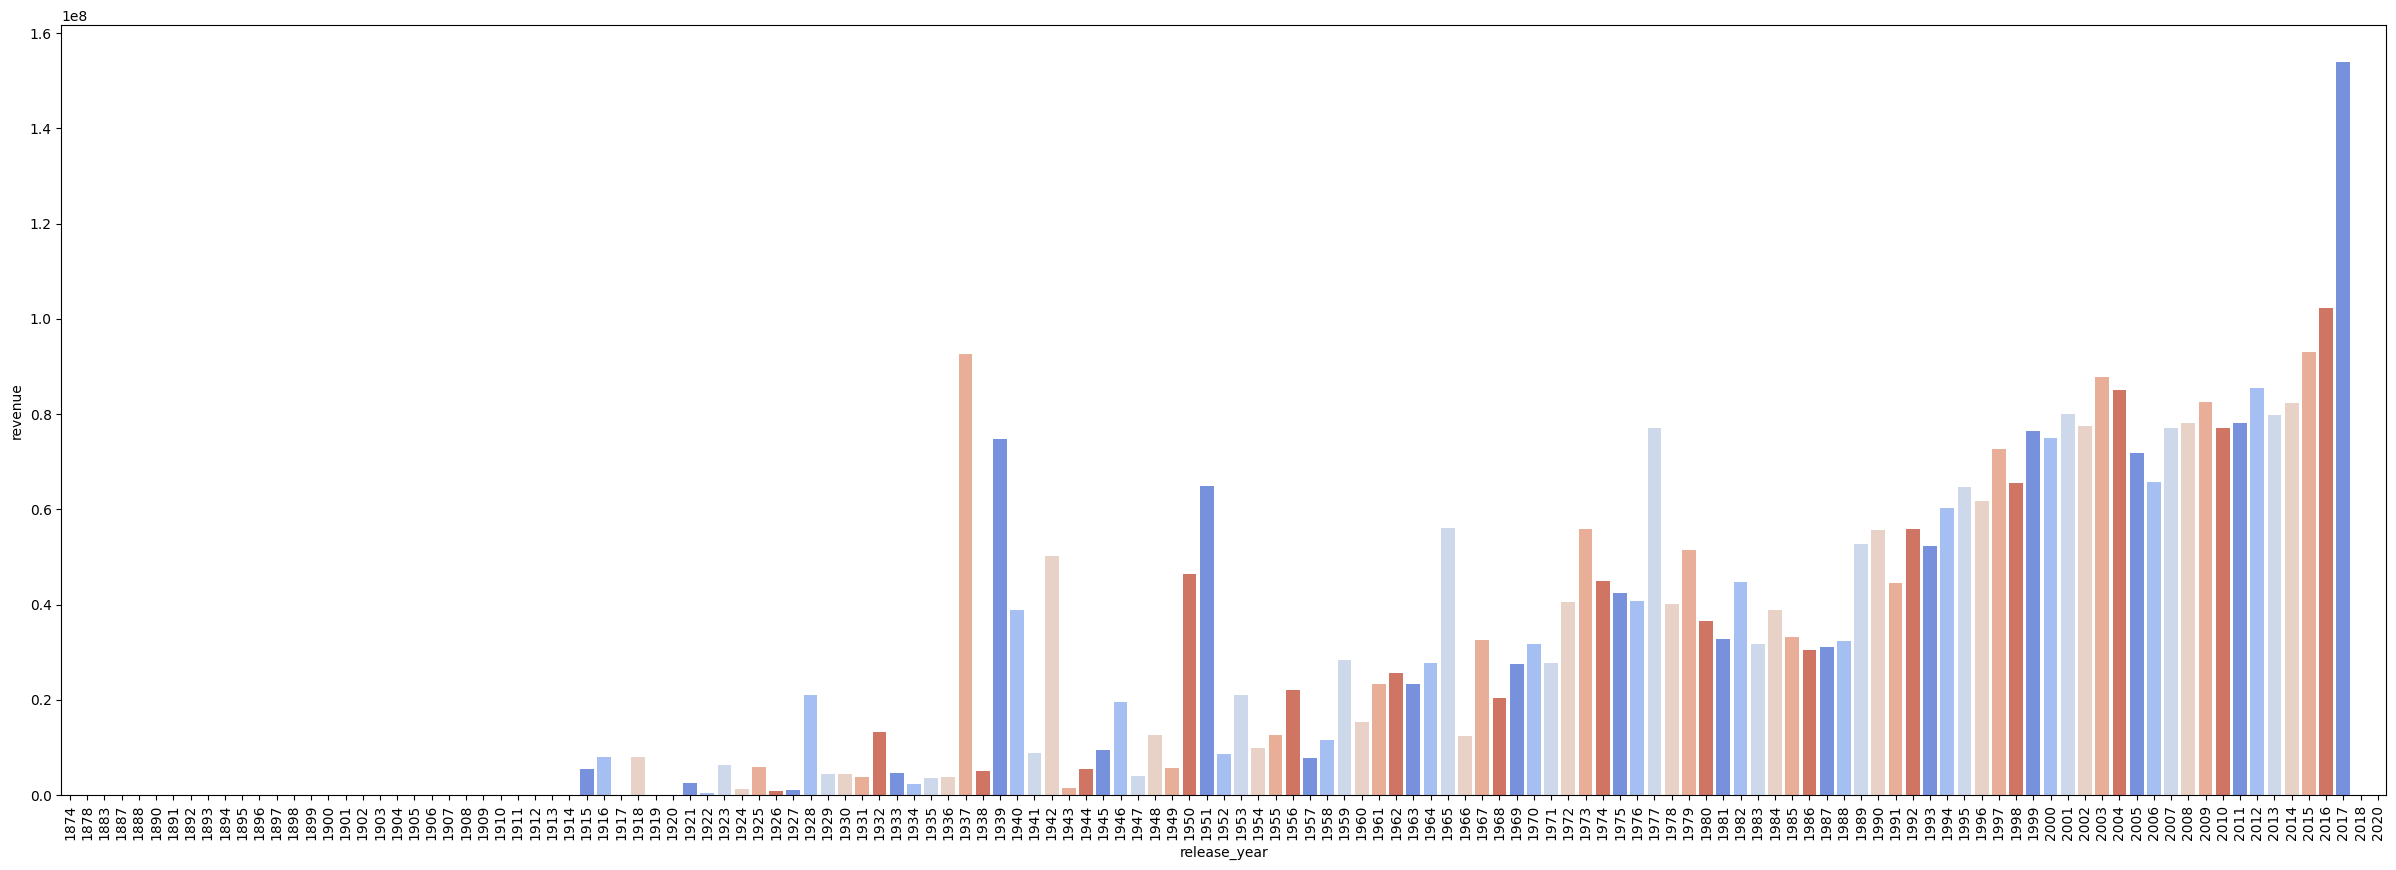

In [40]:
plt.figure(figsize=(30,10))
sns.barplot(data = movies, x='release_year',y='revenue',errorbar=None, palette = sns.color_palette("coolwarm"))
plt.xticks(rotation=90)
plt.show()

**In 2017 movies made the highest revenue**

## Change in movies runtime with year

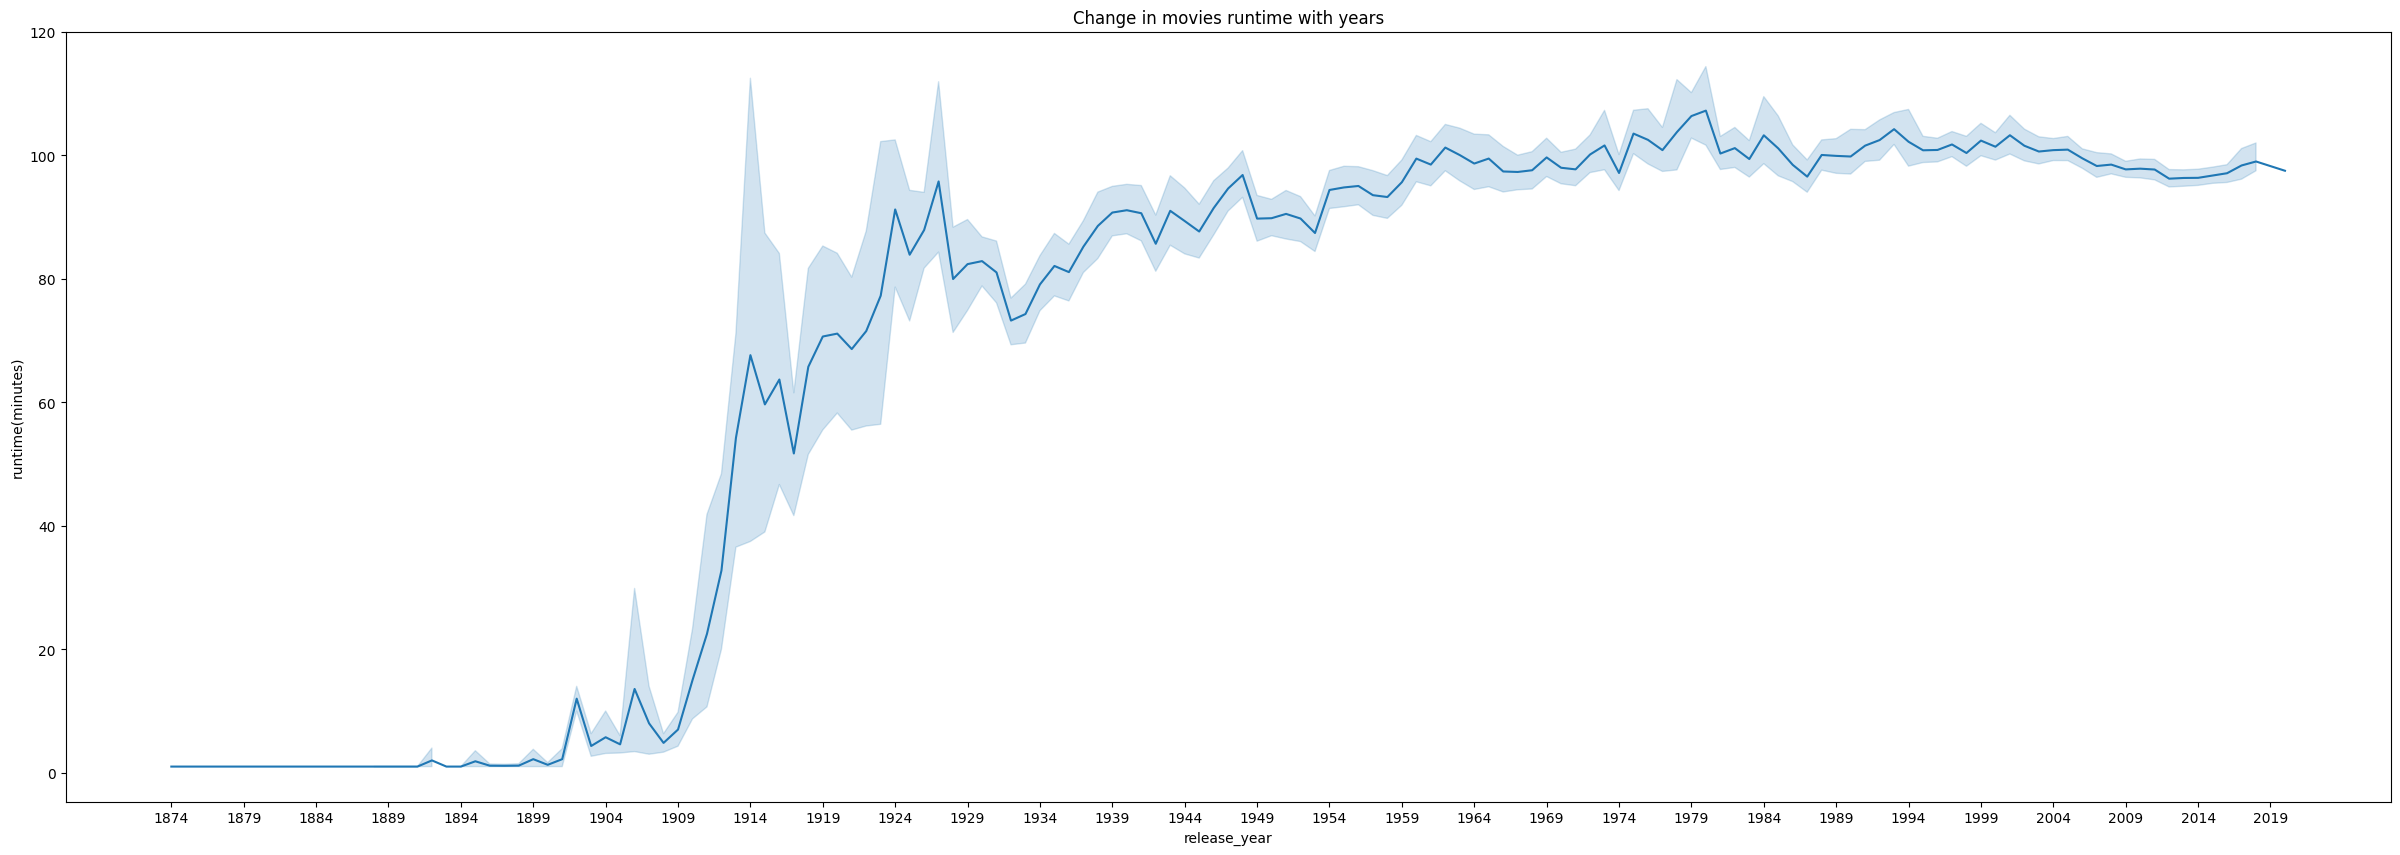

In [41]:
fig = plt.figure(figsize = (30, 10))
sns.lineplot(data= movies , x= 'release_year',y='runtime')
plt.ylabel('runtime(minutes)')
plt.xticks(np.arange(1874, 2024, 5.0))
plt.title('Change in movies runtime with years')
plt.show()

**We can see that there is an sharp increase in runtime after 1900 which makes sense because the number of movies production increased after year 1900 . After year 2000 the average runtime of movies is around 90 to 110 minutes as most number of movies are of english origin.**

## Average Vote count of movies per year

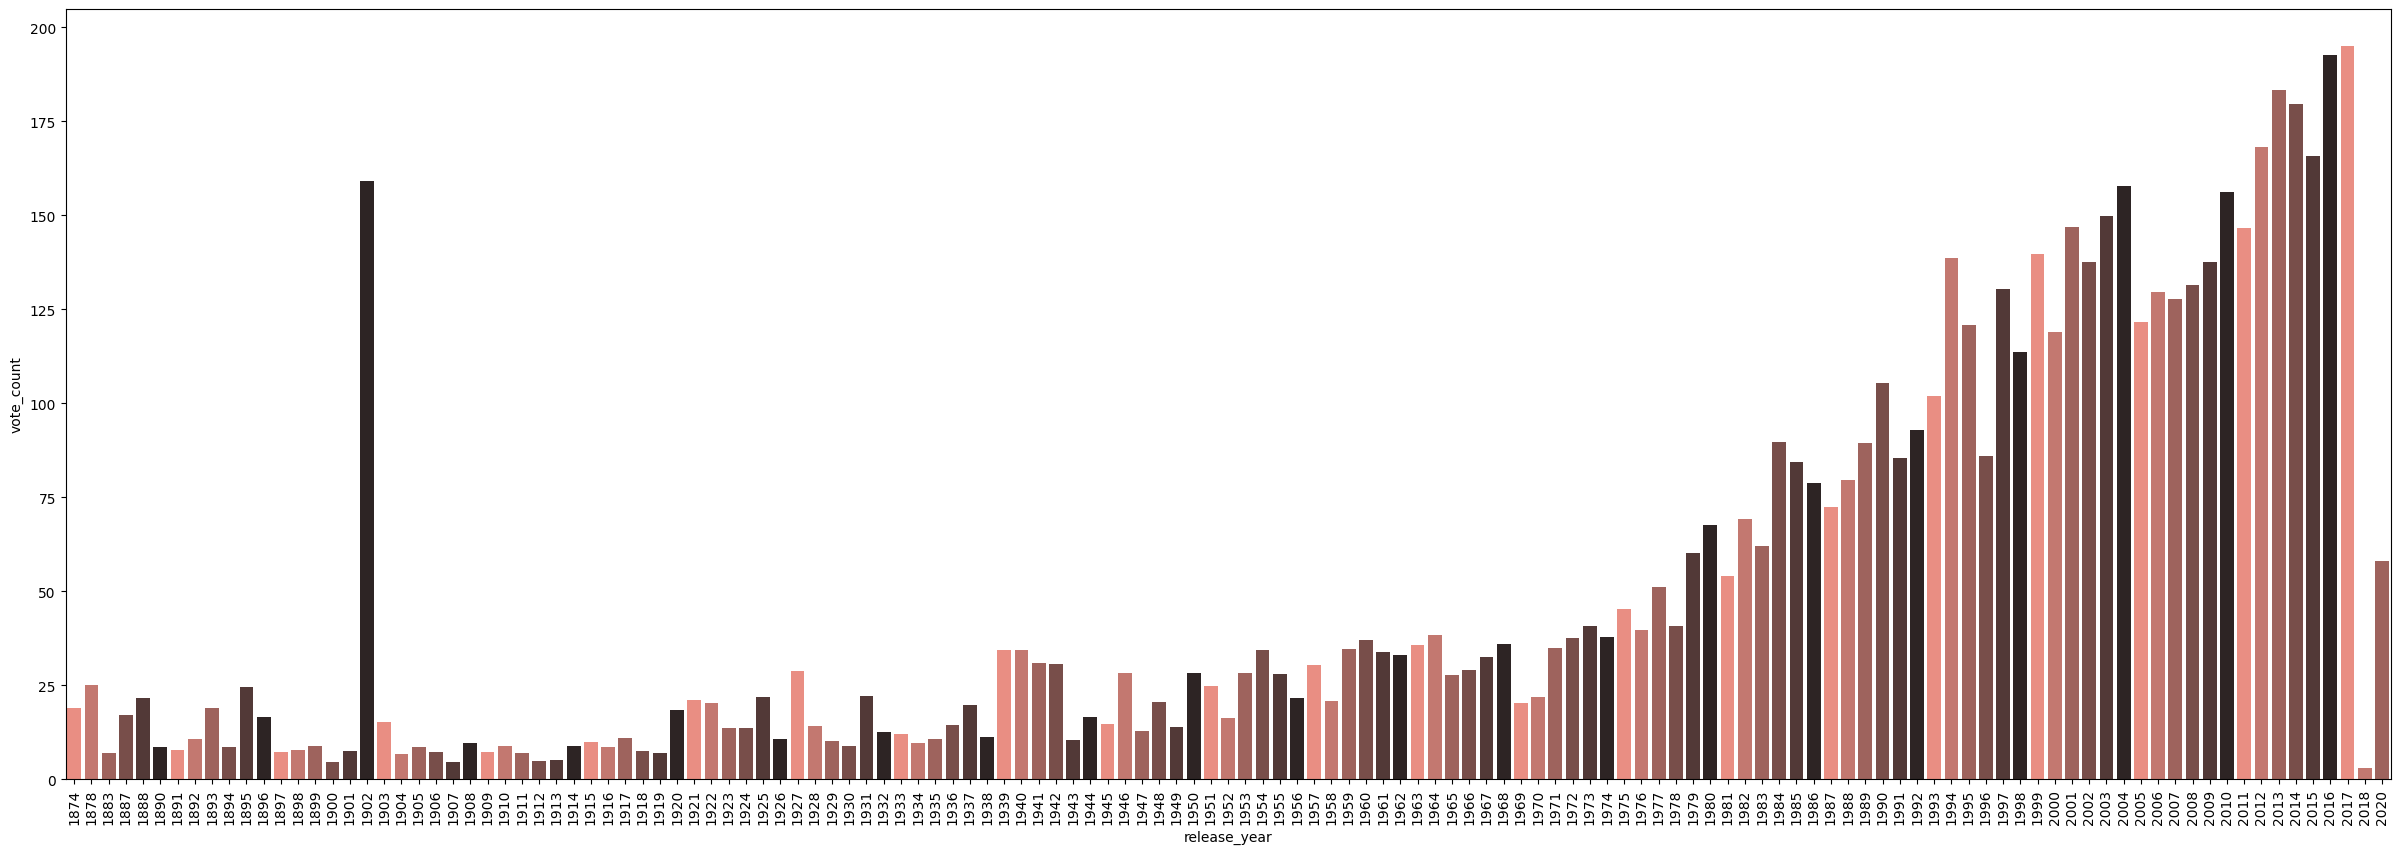

In [42]:
plt.figure(figsize=(30,10))
sns.barplot(x=movies['release_year'],y=movies['vote_count'],errorbar=None, palette = sns.color_palette("dark:salmon_r"))
plt.xticks(rotation=90)
plt.show()

**There is gradual increase in average vote count after year 1970**

## Top 10 largest runtime movies

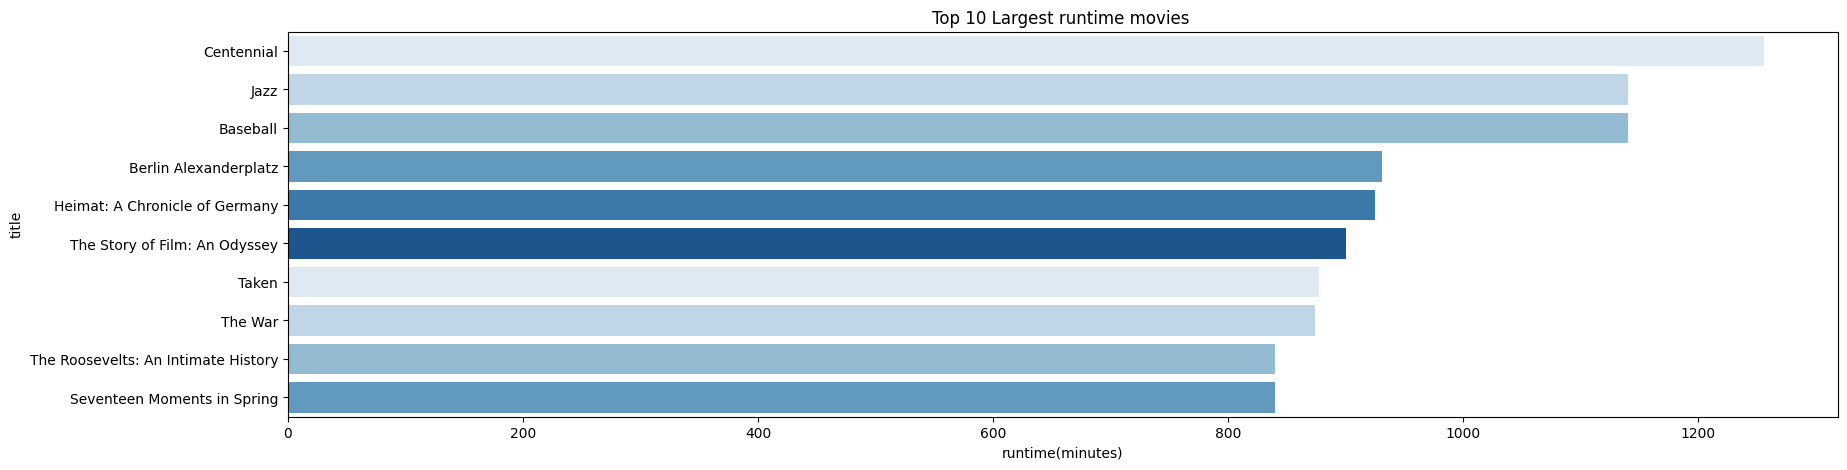

In [43]:
largest_runtime = movies.nlargest(10,'runtime')[['runtime','release_year','title']]

plt.figure(figsize=(20,5))
sns.barplot(x=largest_runtime['runtime'],y=largest_runtime['title'],errorbar=None , palette = sns.color_palette("Blues"))
plt.xlabel('runtime(minutes)')
plt.title('Top 10 Largest runtime movies ')
plt.show()

***Centennial* is the longest runtime movie followed by *Jazz* and *Baseball***

## Top 20 movies with highest revenue

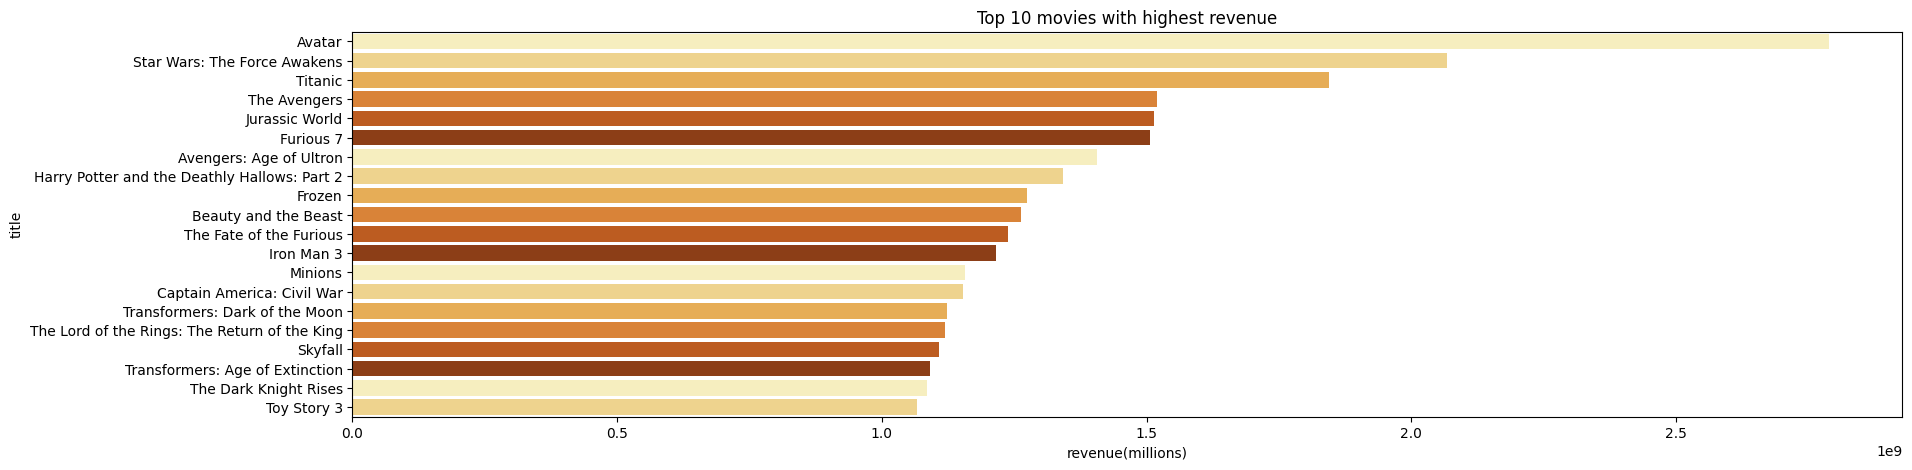

In [44]:
revenue_of_top_20 = movies.sort_values(by='revenue',ascending=False)[0:20][['title','revenue','release_year']]

plt.figure(figsize=(20,5))
sns.barplot(y=revenue_of_top_20['title'],x=revenue_of_top_20['revenue'],errorbar=None , palette = sns.color_palette("YlOrBr"))
plt.xlabel('revenue(millions)')
plt.title('Top 10 movies with highest revenue')
plt.show()

***Avatar* has the highest revenue . It is followed by *Star Wars:The Force Awakens,Titanic , The Avengers,Jurassic World,etc*.**

## Top 20 movies with highest budget 

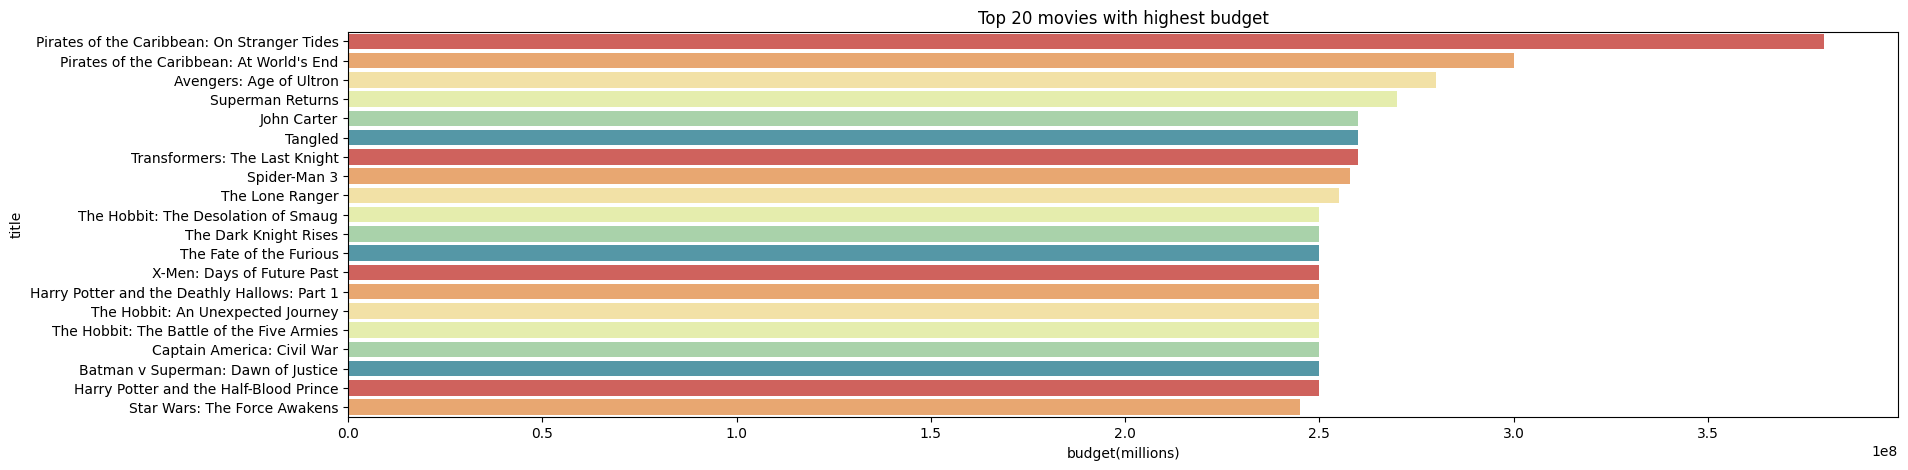

In [45]:
budget_of_top_20 = movies.sort_values(by='budget',ascending=False)[0:20][['title','budget','release_year']]

plt.figure(figsize=(20,5))
sns.barplot(y=budget_of_top_20['title'],x=budget_of_top_20['budget'],errorbar=None , palette = sns.color_palette("Spectral"))
plt.xlabel('budget(millions)')
plt.title('Top 20 movies with highest budget')
plt.show()

**The first 2 films are from *Pirates of the caribbean* franchise followed by *Avengers Age of Ultron and Superman Returns***

## On which weekday most movies are released?

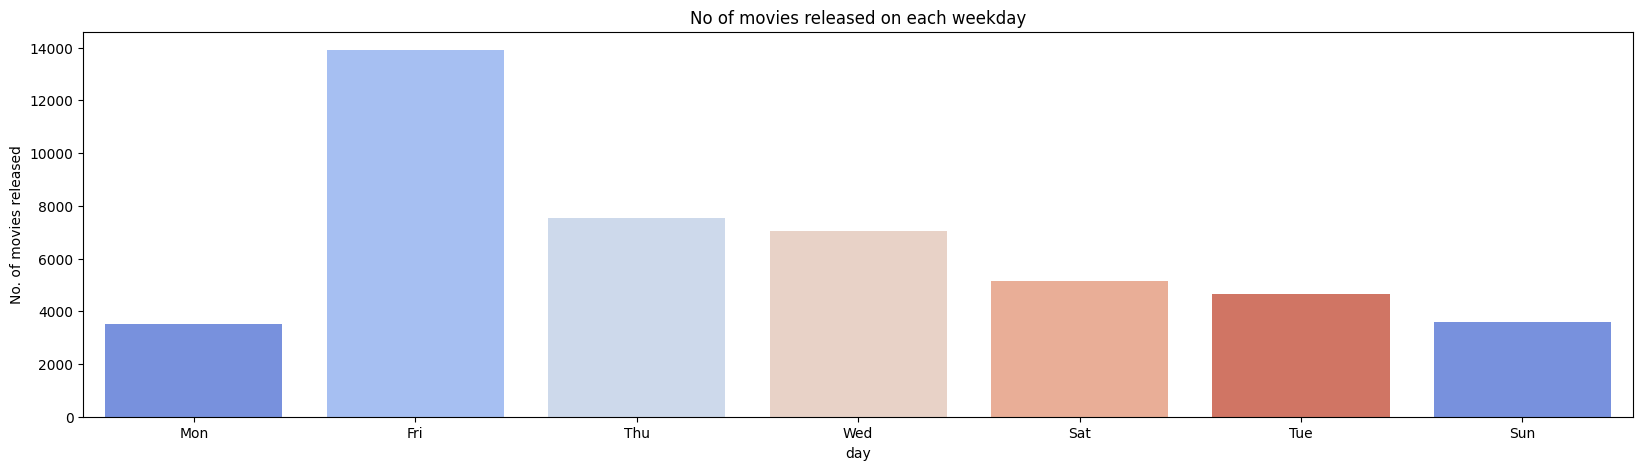

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(x='day',data=movies,palette = sns.color_palette("coolwarm"))
plt.ylabel('No. of movies released')
plt.title('No of movies released on each weekday')
plt.show()

**On Friday most number of movies are released because it is the start of weekend . It is followed by Thursday , Wednesday. On Sunday and Monday less number of movies are released in comparison to other days.**

##  Which months most movies are released?

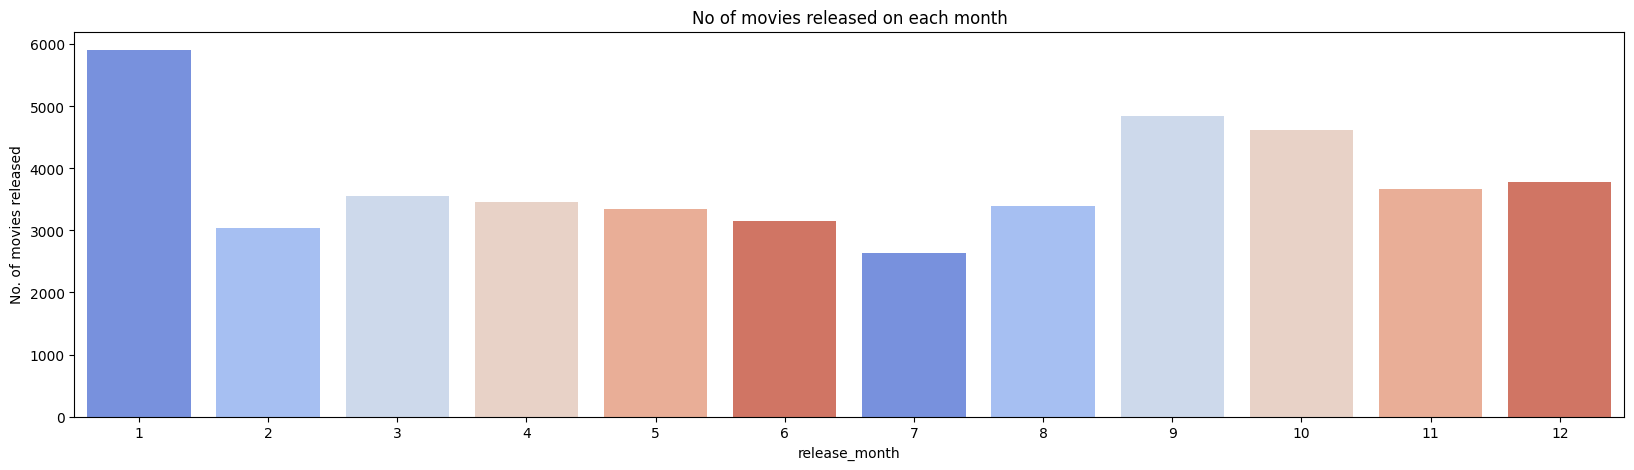

In [47]:
plt.figure(figsize=(20,5))
sns.countplot(x='release_month',data=movies,palette = sns.color_palette("coolwarm"))
plt.ylabel('No. of movies released')
plt.title('No of movies released on each month')
plt.show()

**In January most films are released followed by September and October.**

### In which months the movies makes highest revenues?

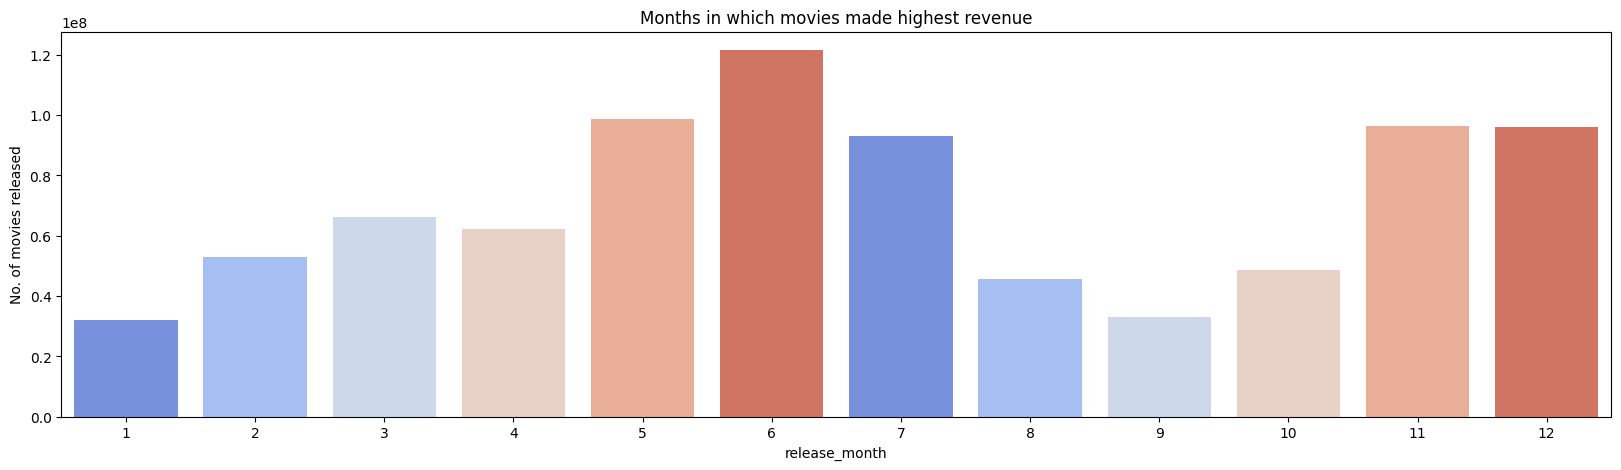

In [48]:
plt.figure(figsize=(20,5))
sns.barplot(x='release_month',y='revenue',data=movies,palette = sns.color_palette("coolwarm"),errorbar=None)
plt.ylabel('No. of movies released')
plt.title('Months in which movies made highest revenue')
plt.show()

**In *may,june,july* the movies makes the highest revenues which makes sense as it is the start of summer holidays.In November and December the revenues are close to each other beacuse it is the start of winter holidays.In rest of the months the revenue made by the movies are less.**

In [49]:
credits = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [50]:
# merging the 'movies' and 'credits' dataframe based on 'id' column
movies = movies.merge(credits,how='left',on='id')
movies = movies.dropna(subset=['cast','crew'] , axis=0)

In [51]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45437 entries, 0 to 45437
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45437 non-null  object        
 1   belongs_to_collection  45437 non-null  int64         
 2   budget                 8907 non-null   float64       
 3   genres                 45437 non-null  object        
 4   id                     45437 non-null  float64       
 5   imdb_id                45437 non-null  object        
 6   original_language      45437 non-null  object        
 7   popularity             45437 non-null  float32       
 8   production_companies   45437 non-null  object        
 9   production_countries   45437 non-null  object        
 10  release_date           45437 non-null  datetime64[ns]
 11  revenue                7427 non-null   float64       
 12  runtime                45437 non-null  float64       
 13  s

In [52]:
# function to get director names from 'crew' column
def get_director_names(row):
    new_list = ast.literal_eval(row)    
    if new_list == [] or isinstance(new_list,float):
        return np.nan
    else:
        inner = []
        for dictionary in new_list:
            job = dictionary.get('job')
            department = dictionary.get('department')
            if((job == 'Director') & (department == 'Directing')):
                inner.append(dictionary['name'])
        return inner

In [53]:
movies['director'] = movies['crew'].apply(get_director_names)
movies['casting'] = movies['cast'].apply(json_to_list)

In [54]:
# get the number of movies done by each actor
actors = get_all_items(movies , 'casting')
actors = {k:v for (k,v) in actors.items() if v > 70}

# get the number of movies directed by each director
director = get_all_items(movies , 'director')
director = {k:v for (k,v) in director.items() if v > 30}

## Major Actors with number of movies done

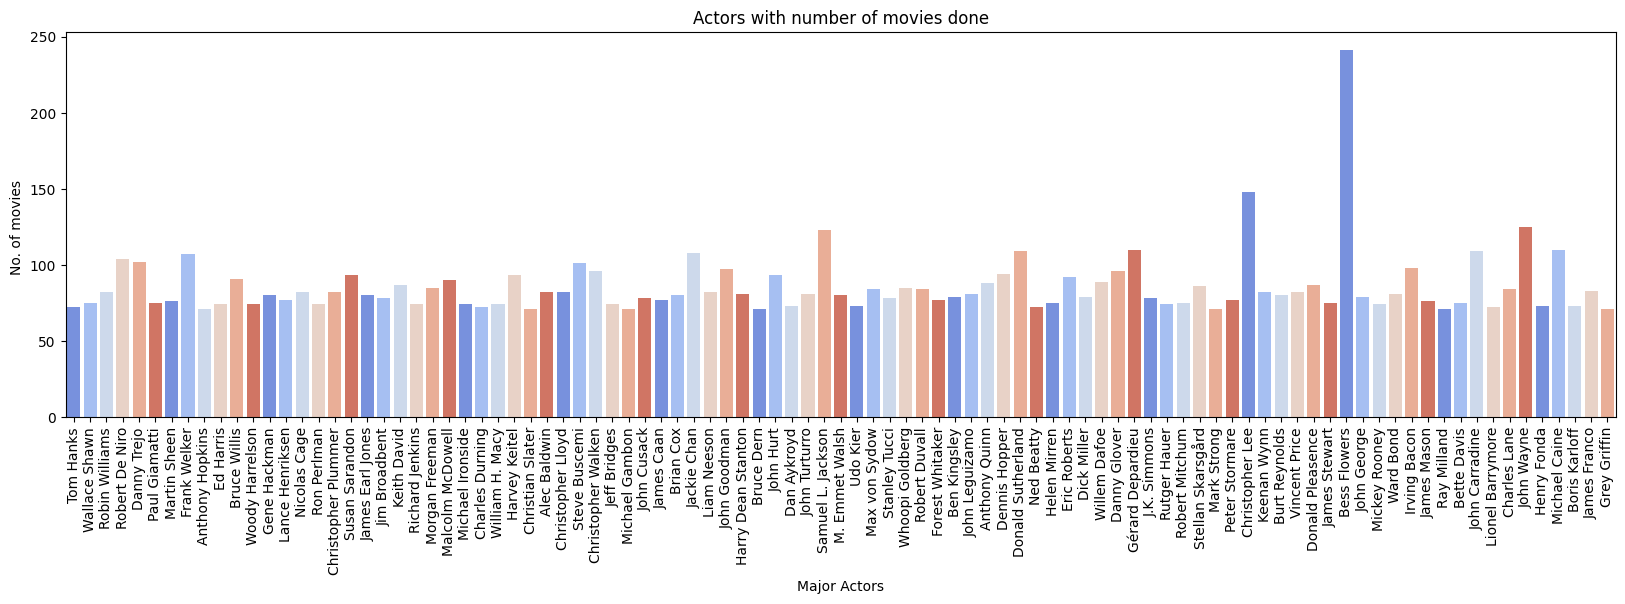

In [55]:
fig = plt.figure(figsize = (20, 5))
actor_keys = list(actors.keys())
actor_values = [int(i) for i in actors.values()]
sns.barplot(x=actor_keys, y = actor_values , palette = sns.color_palette("coolwarm"))
plt.xticks(rotation=90)
plt.xlabel('Major Actors')
plt.ylabel('No. of movies ')
plt.title('Actors with number of movies done')
plt.show()

**Most number of movies are done by *Bess Flowers* followed by *Chrishtopher Lee* and *Samuel L. Jackson***

In [56]:
# filling NaN values with major actors
choices = [['Frank Wekler','Steve Buscemi','Samuel L. Jackson','Donald Sutherland'], ['Christopher Lee','Bess Flowers','John Wayne','Michael Caine']]
movies['casting'] = [random.choice(choices) if isinstance(x,float) else x for x in movies['casting']]

## Major Directors with number of movies directed

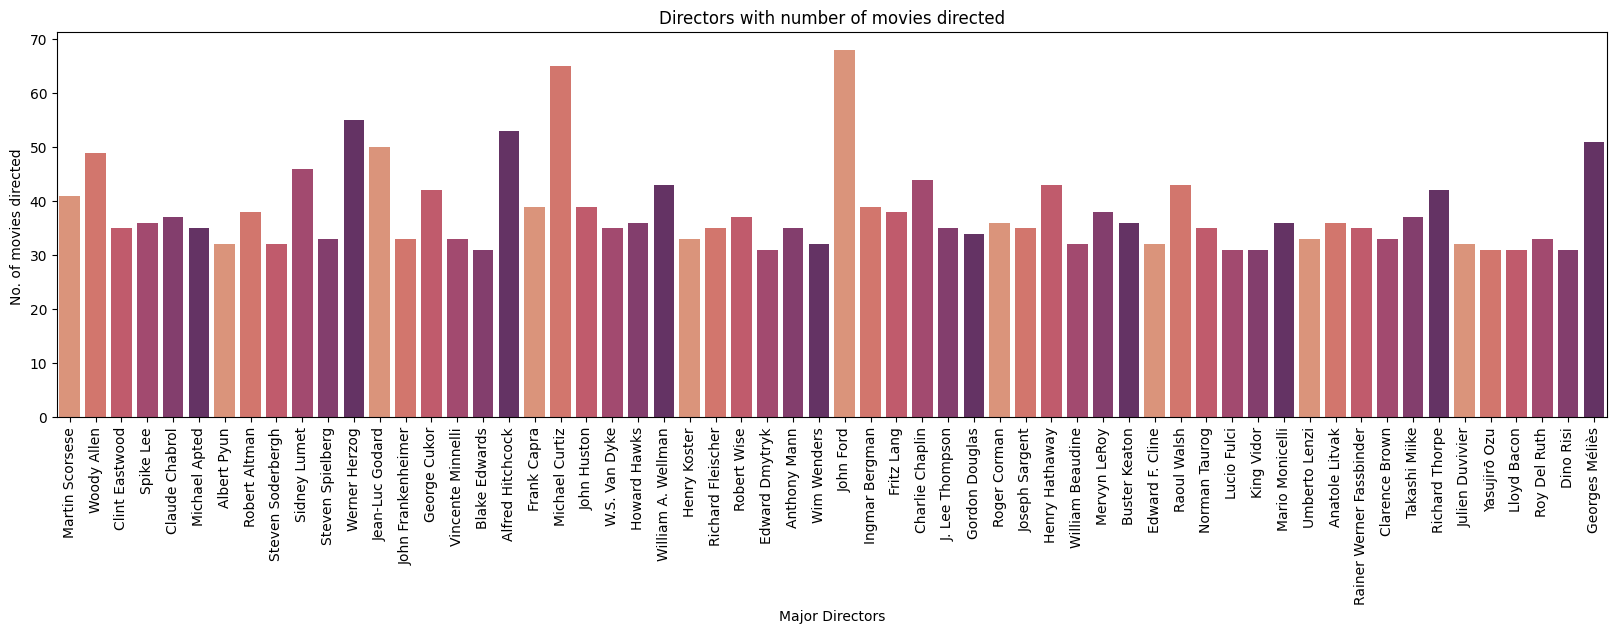

In [57]:
fig = plt.figure(figsize = (20, 5))
dir_keys = list(director.keys())
dir_values = [int(i) for i in director.values()]
sns.barplot(x=dir_keys, y = dir_values, palette = sns.color_palette("flare"))
plt.xticks(rotation=90)
plt.xlabel('Major Directors')
plt.ylabel('No. of movies directed ')
plt.title('Directors with number of movies directed')
plt.show()

***John Ford* has directed most number of movies followed by *Michael Curtiz* and *Werner Herzong***

In [58]:
# filling NaN values with major directors
choices = [['Werner Herzog'],['Michael Curtiz'],['John Ford'],['Alfred Hitchcock']]
movies['director'] = [random.choice(choices) if isinstance(x,float) else x for x in movies['director']]

In [59]:
missing_values(movies)

Total null values count=109036


adult                        0
belongs_to_collection        0
budget                   36530
genres                       0
id                           0
imdb_id                      0
original_language            0
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                  38010
runtime                      0
status                       0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
release_month                0
collection_name              0
day                          0
return                   34496
success_or_flop              0
cast                         0
crew                         0
director                     0
casting                      0
dtype: int64

### Approach 1 - Filling values in 'revenue' and 'budget' columns using median

In [60]:
movies1 = movies.copy()
movies1['revenue_median'] = movies1['revenue'].fillna(movies1['revenue'].median())
movies1['budget_median'] = movies1['budget'].fillna(movies1['budget'].median())
movies1['return'] = movies1['revenue_median'] / movies1['budget_median']

In [61]:
print(movies1.revenue_median.std())
print(movies1.revenue.std())

62102723.41036686
146149230.48676416


<AxesSubplot: xlabel='revenue', ylabel='Density'>

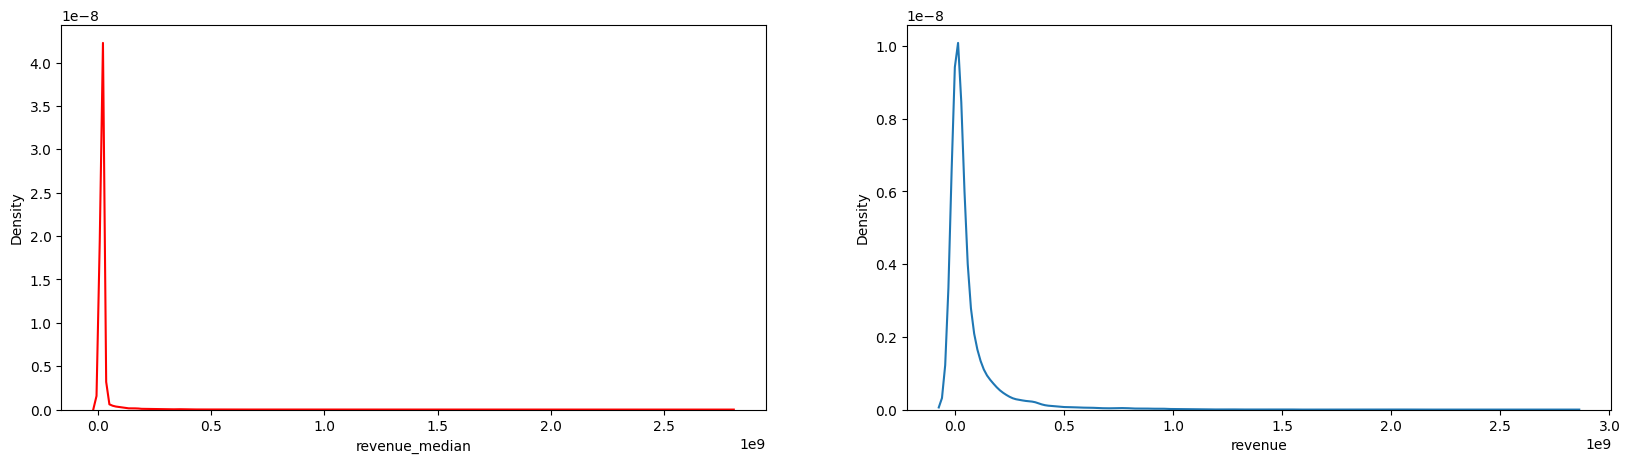

In [62]:
# checking the distribution of 'revenue and revenue_median'. Distortion has occured a little bit.
figure, ax = plt.subplots(1, 2 , figsize=(20, 5))
sns.kdeplot(ax=ax[0] , x = movies1['revenue_median'],color = 'red',)
sns.kdeplot(ax = ax[1] , x = movies['revenue'])

### Approach 2 - Removing the Budget and Revenue columns

In [63]:
movies2 = movies.drop(['revenue','budget','return'] , axis=1)

In [64]:
missing_values(movies2)

Total null values count=0


adult                    0
belongs_to_collection    0
genres                   0
id                       0
imdb_id                  0
original_language        0
popularity               0
production_companies     0
production_countries     0
release_date             0
runtime                  0
status                   0
title                    0
vote_average             0
vote_count               0
release_year             0
release_month            0
collection_name          0
day                      0
success_or_flop          0
cast                     0
crew                     0
director                 0
casting                  0
dtype: int64

### Approach 3 - Using MICE to impute values

In [65]:
print('NAN values % in budget =',movies.budget.isnull().mean()*100)
print('NAN values % in revenue =',movies.revenue.isnull().mean()*100)

NAN values % in budget = 80.39703325483637
NAN values % in revenue = 83.65429055615468


<AxesSubplot: xlabel='revenue', ylabel='Density'>

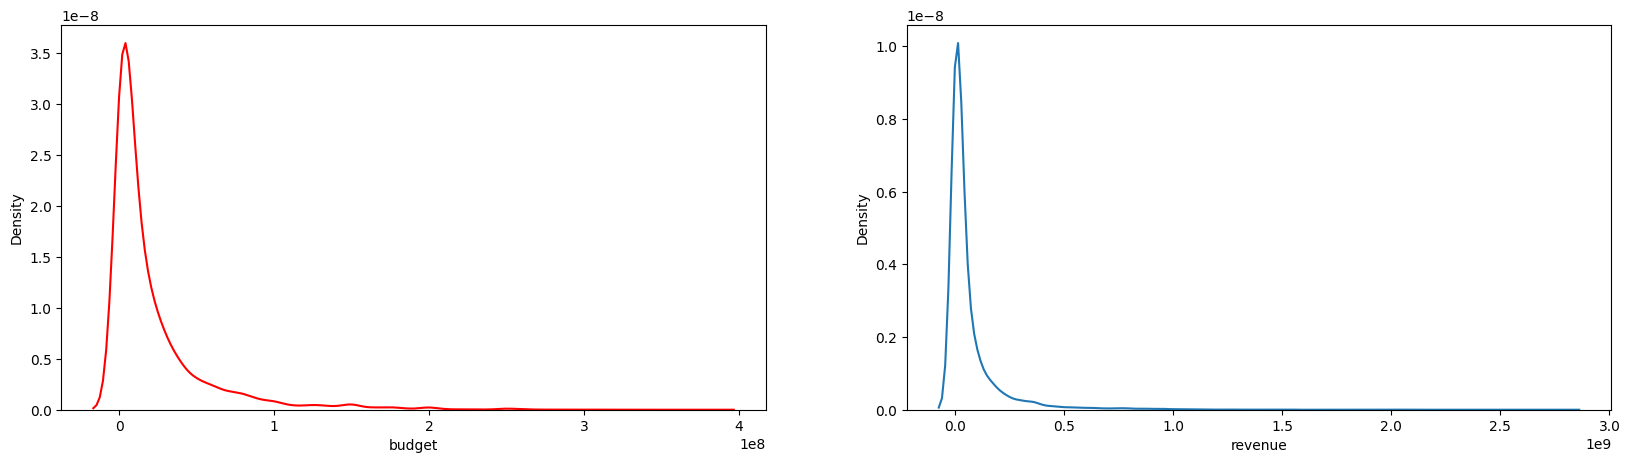

In [66]:
# checking the distribution of revenue and budget 
movies3 = movies.copy()
figure, ax = plt.subplots(1, 2 , figsize=(20, 5))
sns.kdeplot(ax=ax[0] , x = movies3['budget'],color = 'red',)
sns.kdeplot(ax = ax[1] , x = movies3['revenue'])

In [67]:
movies3.head(2)

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,...,release_year,release_month,collection_name,day,return,success_or_flop,cast,crew,director,casting
0,False,1,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,en,21.946943,[Pixar Animation Studios],[US],...,1995,10,Toy Story Collection,Mon,12.451801,1,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,False,0,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],...,1995,12,None,Fri,4.043035,1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",[Joe Johnston],"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."


In [68]:
movies3['adult'] = movies3['adult'].apply(lambda x: 0 if x=='False' else 1)
movies3['genres'] = movies3['genres'].apply(lambda x: len(x))
movies3['original_language'] = movies3['original_language'].apply(lambda x: 1 if x=='en' else 0)
movies3['production_companies'] = movies3['production_companies'].apply(lambda x: len(x))
movies3['production_countries'] = movies3['production_countries'].apply(lambda x: len(x))
movies3['is_Holiday'] = movies3['release_month'].apply(lambda x: 1 if x in [4, 5, 6, 7] else 0)
movies3['is_Friday'] = movies3['day'].apply(lambda x: 1 if x=='Fri' else 0)

movies3.drop(['imdb_id','title','status','cast','crew','director','casting','id','release_date','return','collection_name'],axis=1,inplace=True)
movies3 = pd.get_dummies(movies3, prefix='is').drop(['is_Friday'],axis=1)

In [69]:
movies3.head()

,adult,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,...,release_month,success_or_flop,is_Holiday,is_Fri,is_Mon,is_Sat,is_Sun,is_Thu,is_Tue,is_Wed
0,0,1,30000000.0,3,1,21.946943,1,1,373554033.0,81.0,...,10,1,0,0,1,0,0,0,0,0
1,0,0,65000000.0,3,1,17.015539,3,1,262797249.0,104.0,...,12,1,0,1,0,0,0,0,0,0
2,0,1,NaN,2,1,11.712900,2,1,NaN,101.0,...,12,0,0,1,0,0,0,0,0,0
3,0,0,16000000.0,3,1,3.859495,1,1,81452156.0,127.0,...,12,1,0,1,0,0,0,0,0,0
4,0,1,NaN,1,1,8.387519,2,1,76578911.0,106.0,...,2,1,0,1,0,0,0,0,0,0


In [70]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
column_names = movies3.columns
imputer.fit(movies3)
movies3 = imputer.transform(movies3)
movies3 = pd.DataFrame(movies3,columns=column_names)
movies3.head()

,adult,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,...,release_month,success_or_flop,is_Holiday,is_Fri,is_Mon,is_Sat,is_Sun,is_Thu,is_Tue,is_Wed
0,0.0,1.0,3.000000e+07,3.0,1.0,21.946943,1.0,1.0,3.735540e+08,81.0,...,10.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,6.500000e+07,3.0,1.0,17.015539,3.0,1.0,2.627972e+08,104.0,...,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.026980e+07,2.0,1.0,11.712900,2.0,1.0,5.072586e+07,101.0,...,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.600000e+07,3.0,1.0,3.859495,1.0,1.0,8.145216e+07,127.0,...,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,2.520153e+07,1.0,1.0,8.387519,2.0,1.0,7.657891e+07,106.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
missing_values(movies3)

Total null values count=0


adult                    0
belongs_to_collection    0
budget                   0
genres                   0
original_language        0
popularity               0
production_companies     0
production_countries     0
revenue                  0
runtime                  0
vote_average             0
vote_count               0
release_year             0
release_month            0
success_or_flop          0
is_Holiday               0
is_Fri                   0
is_Mon                   0
is_Sat                   0
is_Sun                   0
is_Thu                   0
is_Tue                   0
is_Wed                   0
dtype: int64

In [72]:
print(movies3.revenue.std())
print(movies.revenue.std())

61660105.86339897
146149230.48676416


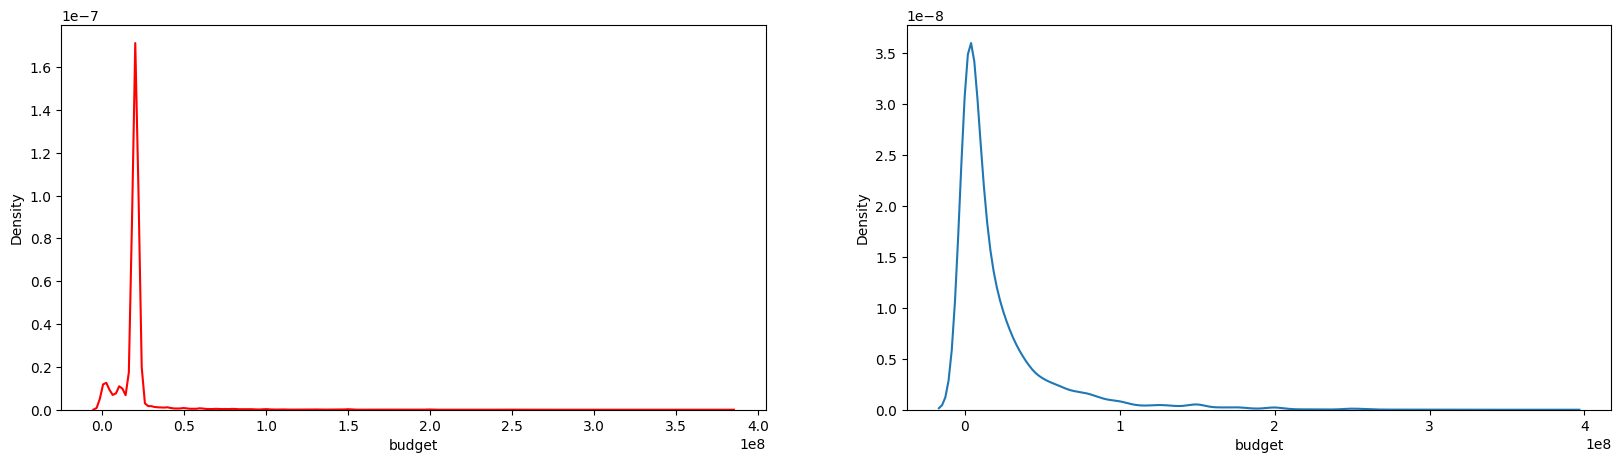

In [73]:
# the distriution of 'revenue' and after applying impuation (Iterative imputer)
figure, ax = plt.subplots(1, 2 , figsize=(20, 5))
sns.kdeplot(ax=ax[0] , x = movies3['budget'],color = 'red',)
sns.kdeplot(ax = ax[1] , x = movies['budget'])
plt.show()

### Approach 4 - Using KNN Imputer

In [74]:
movies5 = movies3.copy()

In [75]:
from sklearn.impute import KNNImputer

column_names = movies5.columns
imputer = KNNImputer()
imputer.fit(movies5)
movies5 = imputer.transform(movies5)
movies5 = pd.DataFrame(movies5,columns=column_names)

In [76]:
missing_values(movies5)

Total null values count=0


adult                    0
belongs_to_collection    0
budget                   0
genres                   0
original_language        0
popularity               0
production_companies     0
production_countries     0
revenue                  0
runtime                  0
vote_average             0
vote_count               0
release_year             0
release_month            0
success_or_flop          0
is_Holiday               0
is_Fri                   0
is_Mon                   0
is_Sat                   0
is_Sun                   0
is_Thu                   0
is_Tue                   0
is_Wed                   0
dtype: int64

In [77]:
print(movies5.revenue.std())
print(movies.revenue.std())

61660105.86339897
146149230.48676416


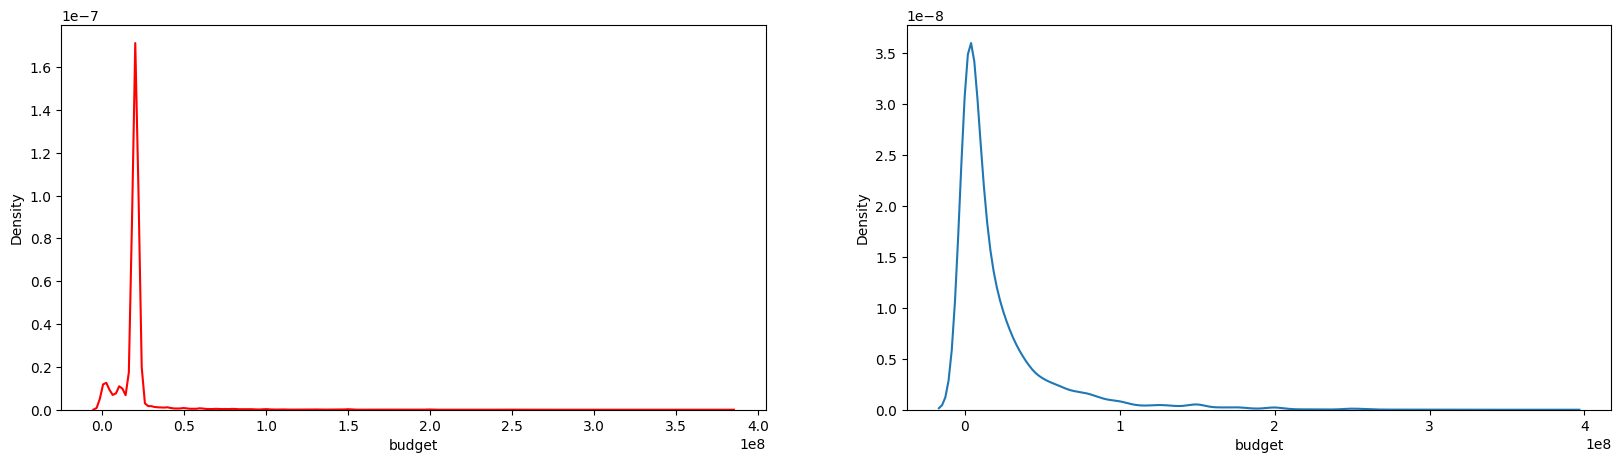

In [78]:
# the distriution of 'revenue' and after applying impuation (KNN imputer)

figure, ax = plt.subplots(1, 2 , figsize=(20, 5))
sns.kdeplot(ax=ax[0] , x = movies5['budget'],color = 'red',)
sns.kdeplot(ax = ax[1] , x = movies['budget'])
plt.show()

<AxesSubplot: >

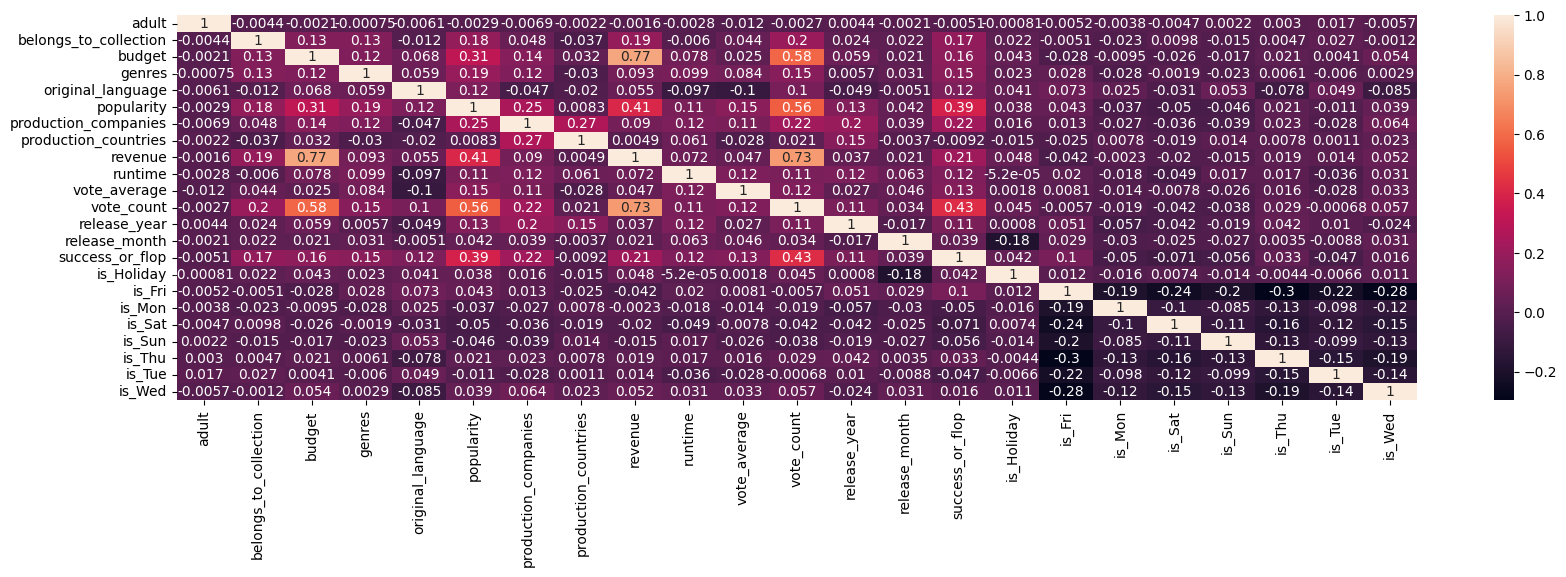

In [79]:
# heatmap to show co - relation between features
plt.figure(figsize=(20,5))
sns.heatmap(movies5.corr(),annot=True)

### Approach 4 -  Making new features to denote the missing values

In [80]:
movies6 = movies.copy()
movies6['revenue_isna'] = movies6['revenue'].map(lambda x: 1 if pd.isna(x) else 0)
movies6['budget_isna'] = movies6['budget'].map(lambda x : 1 if pd.isna(x) else 0)
movies6['return_isna'] = movies6['return'].map(lambda x : 1 if pd.isna(x) else 0)

movies6['revenue'] = movies6.revenue.fillna(movies6.revenue.median())
movies6['budget'] = movies6.budget.fillna(movies6.budget.median())
movies6['return'] = movies6.revenue / movies6.budget

In [81]:
missing_values(movies6)

Total null values count=0


adult                    0
belongs_to_collection    0
budget                   0
genres                   0
id                       0
imdb_id                  0
original_language        0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
status                   0
title                    0
vote_average             0
vote_count               0
release_year             0
release_month            0
collection_name          0
day                      0
return                   0
success_or_flop          0
cast                     0
crew                     0
director                 0
casting                  0
revenue_isna             0
budget_isna              0
return_isna              0
dtype: int64